Scineurotech lab 
Theodore 

The purpose of this notebook is to analyze the data stored in the `.npz` file.

For this, we will use the `PostProcessor` class. It is important to note that the `.npz` files actually contain several GPBO simulations. Indeed, we generally perform a number `REP` of repetitions on each EMG. The data provided by the `PostProcessor` methods will calculate averages of all the different simulations in the file, and this for each iteration.


## A) Import libs

In [3]:
## ------------------------ IMPORT LIB ------------------------ ##

import numpy as np
import matplotlib.pyplot as plt
from DataSet import DataSet
from PostProcessor import PostProcessor
from scipy.stats import linregress
import matplotlib.lines as mlines
import torch

## B) How to use the `PostProcessor` class ?

### B.1) If you want to focus on the evolution of the hyperparameters

It is possible to observe the hyperparameters of a simulation only if they have been recorded in the `.npz` file.

In this section, we will observe the hyperparameters for the simulation from the file: `results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA4.npz`.

First, you have to load data using the `PostProcessor` class. Do not forget to specify `load_hyperparams=True`.

In [16]:
pp_obs = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA4.npz')
pp_obs.load_data(load_hyperparams=True)

The method `hyperparams_metrics` return the mean of the HPs for each iteration.

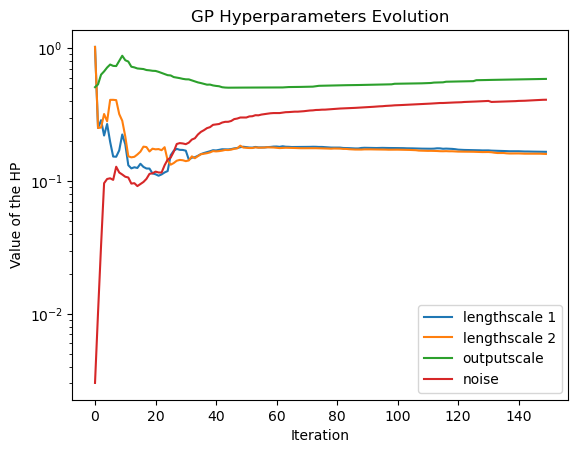

In [18]:
lengthscale_obs, outputscale_obs, noise_obs = pp_obs.hyperparams_metrics()
plt.figure()
plt.plot(lengthscale_obs[0], label='lengthscale 1')
plt.plot(lengthscale_obs[1], label='lengthscale 2') 
plt.plot(outputscale_obs, label='outputscale')
plt.plot(noise_obs, label='noise')
plt.legend()
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Value of the HP')
plt.title('GP Hyperparameters Evolution')
plt.show()

### B.2) If you want to compare different settings according to the evolution of the exploration & exploitation metrics 

We will use two metrics: 

- __Exploration__: The strategy of selecting points in regions where the model uncertainty is high, aiming to improve the overall understanding of the objective function and potentially discover better optima.
- __Exploitation__: The strategy of selecting points in regions where the model predicts high rewards, focusing on refining the current best solutions rather than exploring unknown areas.

For more info about how these metrics are calculated, see `SimGPBO.py` & `Postprocessor.py`. 


We will compare simulations using UCB as the acquisition function. We will observe the influence of the KAPPA hyperparameter. 

So we need to load all these `.npz` files.

In [19]:
pp4 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA4.npz')
pp4.load_data()

pp5 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA5_10rep.npz')
pp5.load_data()

pp6 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA6_10rep.npz')
pp6.load_data()

pp7 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA7_10rep.npz')
pp7.load_data()

pp8 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA8_10rep.npz')
pp8.load_data()

pp10 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA10_10rep.npz')
pp10.load_data()

pp12 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_valid_KAPPA12_10rep.npz')
pp12.load_data()

Let's plot exploration and exploitation for one KAPPA:

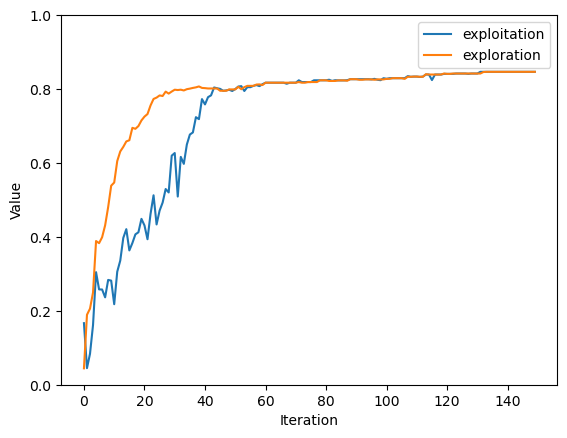

In [21]:
plt.plot(pp4.exploitation(), label='exploitation')
plt.plot(pp4.exploration(), label='exploration')
plt.legend()
plt.ylim(0,1)
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.show()

Now, let's plot for various KAPPAs:

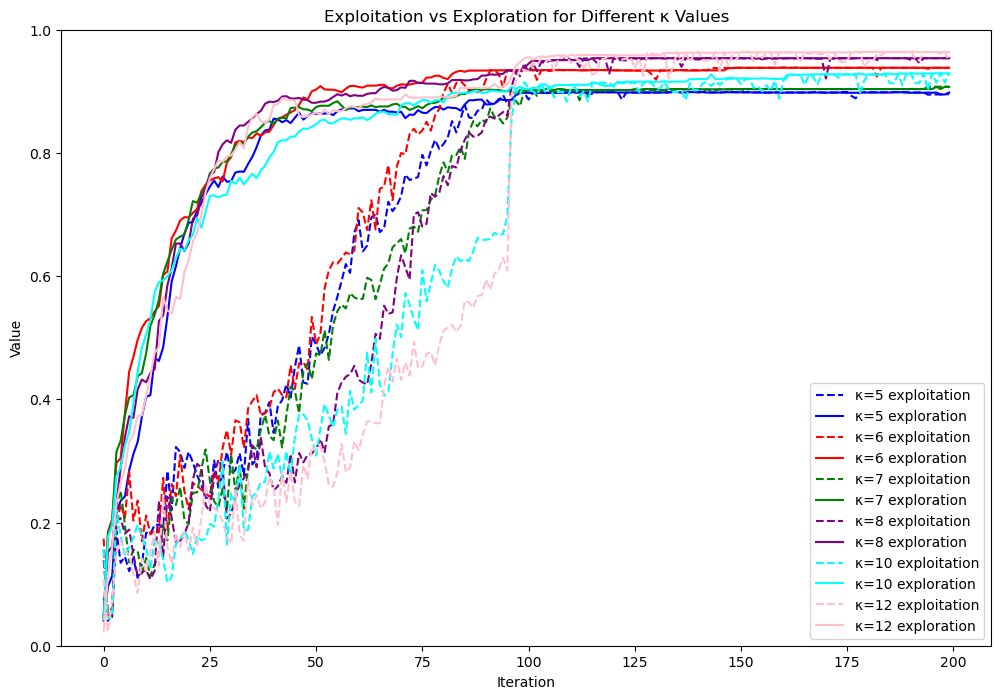

In [22]:
# Define colors for each kappa value
colors = ['blue', 'red', 'green', 'purple', 'cyan', 'pink']

plt.figure(figsize=(12,8))


plt.plot(pp5.exploitation(), '--', color=colors[0], label='κ=5 exploitation')
plt.plot(pp5.exploration(), '-', color=colors[0], label='κ=5 exploration')

plt.plot(pp6.exploitation(), '--', color=colors[1], label='κ=6 exploitation') 
plt.plot(pp6.exploration(), '-', color=colors[1], label='κ=6 exploration')

plt.plot(pp7.exploitation(), '--', color=colors[2], label='κ=7 exploitation') 
plt.plot(pp7.exploration(), '-', color=colors[2], label='κ=7 exploration')

plt.plot(pp8.exploitation(), '--', color=colors[3], label='κ=8 exploitation')
plt.plot(pp8.exploration(), '-', color=colors[3], label='κ=8 exploration')

plt.plot(pp10.exploitation(), '--', color=colors[4], label='κ=10 exploitation')
plt.plot(pp10.exploration(), '-', color=colors[4], label='κ=10 exploration')

plt.plot(pp12.exploitation(), '--', color=colors[5], label='κ=12 exploitation')
plt.plot(pp12.exploration(), '-', color=colors[5], label='κ=12 exploration')

plt.legend()
plt.ylim(0,1)
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Exploitation vs Exploration for Different κ Values')
plt.show()

### B.3) If you want to mesure the computation time of some step of your simulation

For this example, we will observe the result for a huge simulation of 5000 iteration which used our SVGP (sparse variational gaussian process) surrogate model (cf. `gpbo_estimated_gpytorch` method in `SimGPBO.py`).

In [34]:
pptime = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_ttest_pseudo_gpy_5000it.npz')
pptime.load_data(load_durations=True)

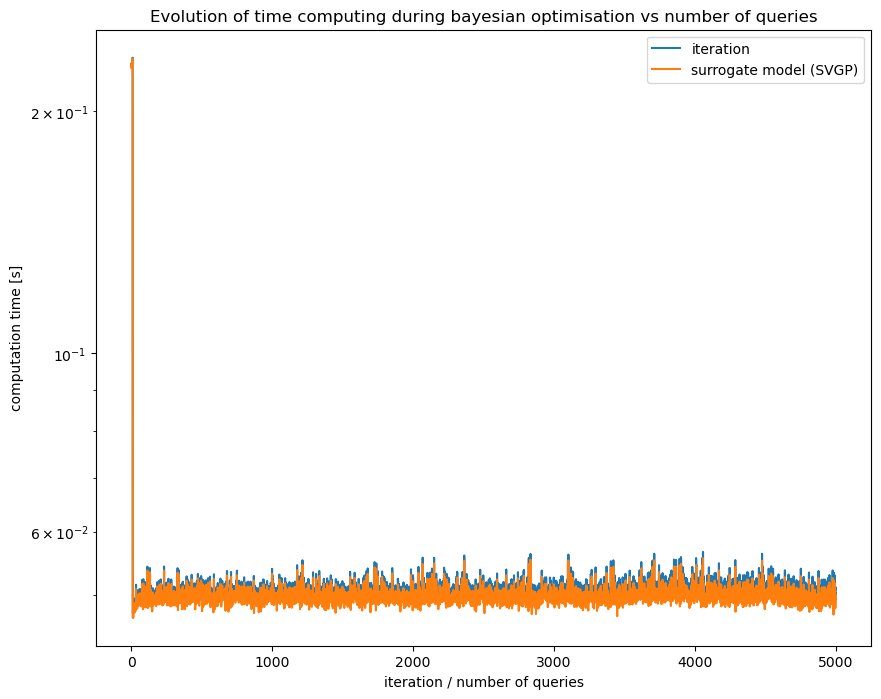

In [36]:
perf_iter, perf_gp, perf_hyp = pptime.duration_metrics()
plt.figure(figsize=(10,8))
plt.plot(perf_iter, label='iteration')
plt.plot(perf_gp, label='surrogate model (SVGP)')
plt.yscale('log')
plt.xlabel('iteration / number of queries')
plt.ylabel('computation time [s]')
plt.legend()
plt.title('Evolution of time computing during bayesian optimisation vs number of queries')
plt.show()

This plot doesn't allow us to visualize well everything but we can see that the comlexity of the surrogate model is constant. 

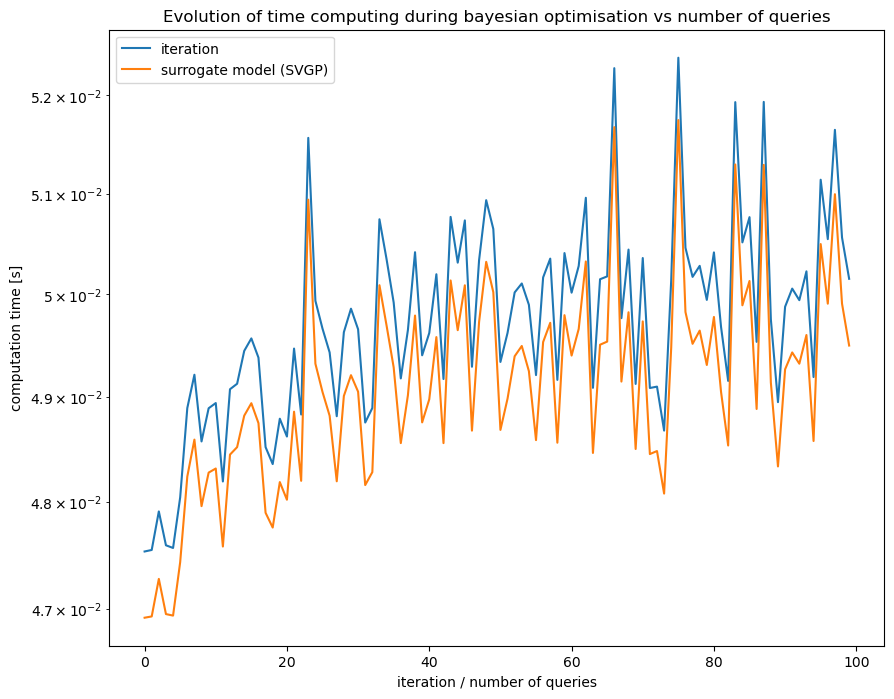

In [39]:
perf_iter, perf_gp, perf_hyp = pptime.duration_metrics()
plt.figure(figsize=(10,8))
plt.plot(perf_iter[10:110], label='iteration')
plt.plot(perf_gp[10:110], label='surrogate model (SVGP)')
plt.yscale('log')
plt.xlabel('iteration / number of queries')
plt.ylabel('computation time [s]')
plt.legend()
plt.title('Evolution of time computing during bayesian optimisation vs number of queries')
plt.show()

We can also observe that it is not constant at the beginning of the simulation because not all the inducing points have been discovered yet.

## C) Using QueriesInfo, what changes ? 

The `QueriesInfo` class allows you to use two different surrogate model methods in `SimGPBO`:

- `estimated_gpytorch_gpbo` is the method for SVGP (Sparse Variational Gaussian Process). It uses the `QueriesInfo` class to optimize the hyperparameters (HPs) and to make predictions.

- `estimated_hp_gpytorch_gpbo` is another method that uses the `QueriesInfo` class only to optimize the HPs. However, it uses a Gaussian Process with the entire set of queries as the training dataset for prediction.

In [4]:
pp1 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test1.npz')
pp1.load_data(load_hyperparams=True)

pp2 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy.npz')
pp2.load_data(load_hyperparams=True)

pp2bis = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_.npz')
pp2bis.load_data(load_hyperparams=True)

pp3 = PostProcessor('results/gpbo_estimated_hp_gpytorch_UCB_cebus1_test_pseudo_hp.npz')
pp3.load_data(load_hyperparams=True)

In the following plot, we compare the performance for KAPPA=6 of a classical GP, our SVGP (which uses the `estimated_gpytorch_gpbo` method), and a GP that uses the `estimated_hp_gpytorch_gpbo` method.

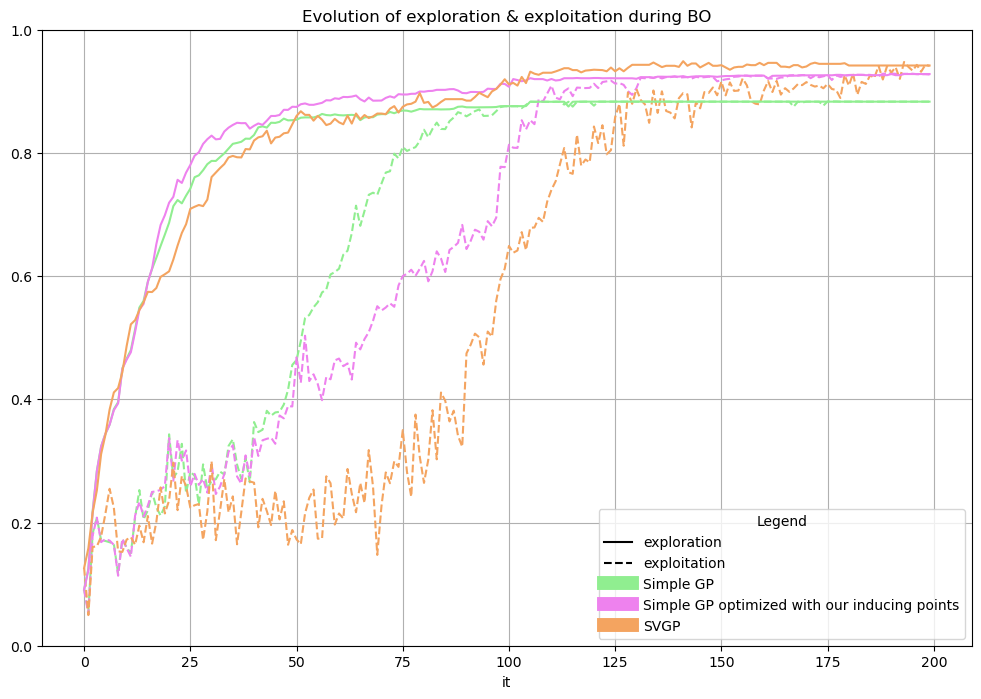

In [5]:
# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown',
    'sim6': 'gold',
    'sim7': 'mediumaquamarine',
    'sim8': 'plum',
    'sim9': 'salmon',
    'sim10': 'lightskyblue'
}

plt.figure(figsize=(12, 8)) 

# Plot exploitation
plt.plot(pp1.exploitation(), color=colors['sim3'], linestyle='--')
plt.plot(pp3.exploitation(), color=colors['sim4'], linestyle='--')
plt.plot(pp2bis.exploitation(), color=colors['sim5'], linestyle='--')

# Plot exploration
plt.plot(pp1.exploration(measured_location=True), color=colors['sim3'], linestyle='-')
plt.plot(pp3.exploration(measured_location=True), color=colors['sim4'], linestyle='-')
plt.plot(pp2bis.exploration(measured_location=True), color=colors['sim5'], linestyle='-')


# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')


model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='Simple GP', linestyle='-', linewidth = '10')
model4_patch = mlines.Line2D([], [], color=colors['sim4'], label='Simple GP optimized with our inducing points', linestyle='-', linewidth = '10')
model5_patch = mlines.Line2D([], [], color=colors['sim5'], label='SVGP', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, model3_patch, model4_patch, model5_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO")
plt.grid()

# Display the plot
plt.show()

## C) Find best fixed (noise, outputscale)

We wanted to fixed the 2 following HPs : outputscale & noise variance.

We knew that it is common to fix outputscale=1. So we wanted to test the performance with different noise variance. We found that noise variance = 0.05 is good. 

After that we just check that outputscale = 1 is correct too. 


Finaly we will choose :
- noise = 0.005
- outputscale = 1

### C.1) Find the best noise for outputscale=1

In [6]:
ppf0025 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise0025.npz')
ppf0025.load_data(load_hyperparams=True)

ppf005 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise005.npz')
ppf005.load_data(load_hyperparams=True)
ppf005n = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise005_n.npz')
ppf005n.load_data(load_hyperparams=True)

ppf0075 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise0075.npz')
ppf0075.load_data(load_hyperparams=True)

ppf0075n = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise0075_n.npz')
ppf0075n.load_data(load_hyperparams=True)
ppf0075nn = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise0075_nn.npz')
ppf0075nn.load_data(load_hyperparams=True)
ppf0075nv = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise0075_nv.npz')
ppf0075nv.load_data(load_hyperparams=True)

ppf01 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise01.npz')
ppf01.load_data(load_hyperparams=True)
ppf01n = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise01_n.npz')
ppf01n.load_data(load_hyperparams=True)

ppf02 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise02.npz')
ppf02.load_data(load_hyperparams=True)

ppf04 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise04.npz')
ppf04.load_data(load_hyperparams=True)

ppf07 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale1_noise07.npz')
ppf07.load_data(load_hyperparams=True)

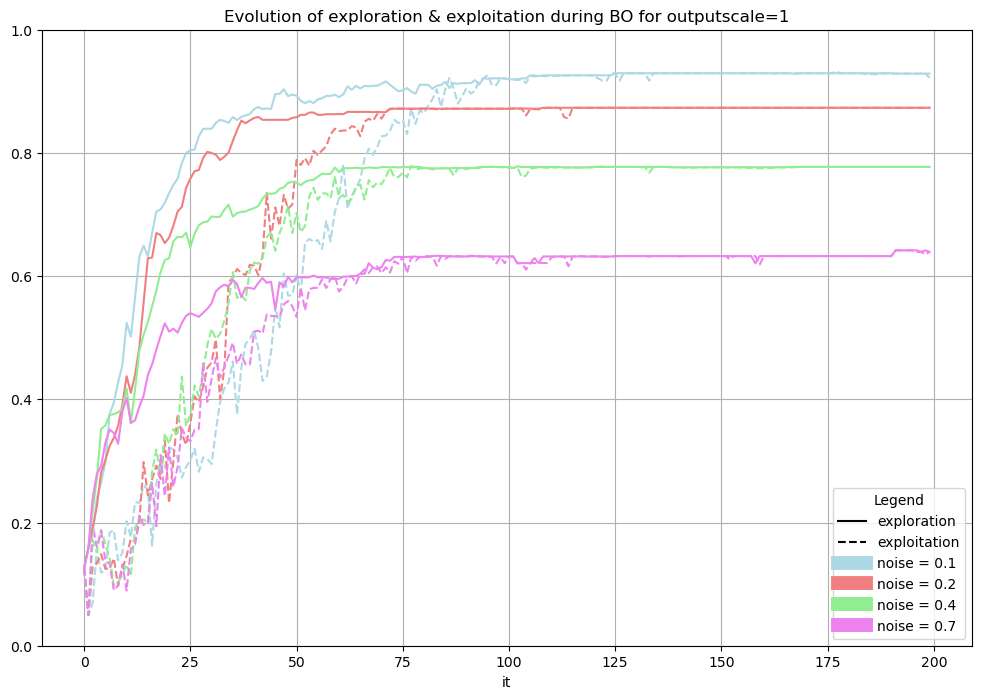

In [7]:
# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown'
}

plt.figure(figsize=(12, 8)) 

plt.plot(ppf01.exploitation(), color=colors['sim1'], linestyle='--')
plt.plot(ppf02.exploitation(), color=colors['sim2'], linestyle='--')
plt.plot(ppf04.exploitation(), color=colors['sim3'], linestyle='--')
plt.plot(ppf07.exploitation(), color=colors['sim4'], linestyle='--')

plt.plot(ppf01.exploration(), color=colors['sim1'], linestyle='-')
plt.plot(ppf02.exploration(), color=colors['sim2'], linestyle='-')
plt.plot(ppf04.exploration(), color=colors['sim3'], linestyle='-')
plt.plot(ppf07.exploration(), color=colors['sim4'], linestyle='-')

# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')

model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='noise = 0.1', linestyle='-', linewidth = '10')
model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='noise = 0.2', linestyle='-', linewidth = '10')
model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='noise = 0.4', linestyle='-', linewidth = '10')
model6_patch = mlines.Line2D([], [], color=colors['sim4'], label='noise = 0.7', linestyle='-', linewidth = '10')


# Add the legend
plt.legend(handles=[train_line, validation_line, model1_patch, model2_patch, model3_patch, model6_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO for outputscale=1")
plt.grid()

# Display the plot
plt.show()

It seems that noise variance should be smaller than 0.2 .

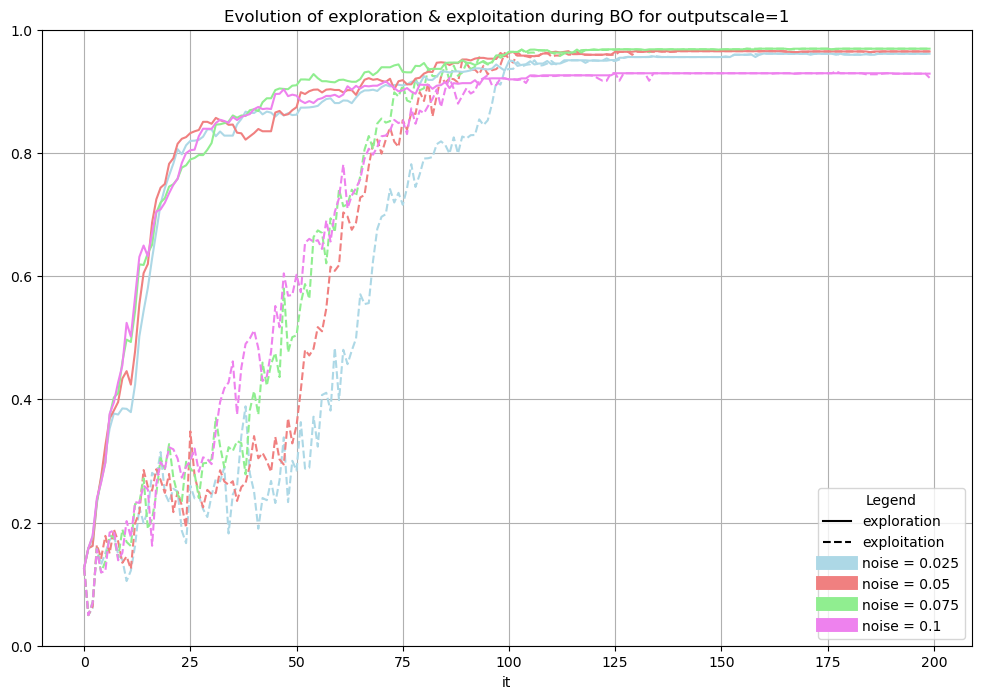

In [8]:

# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown'
}

plt.figure(figsize=(12, 8)) 


plt.plot(ppf0025.exploitation(), color=colors['sim1'], linestyle='--')
plt.plot(ppf005.exploitation(), color=colors['sim2'], linestyle='--')
plt.plot(ppf0075.exploitation(), color=colors['sim3'], linestyle='--')
plt.plot(ppf01.exploitation(), color=colors['sim4'], linestyle='--')


plt.plot(ppf0025.exploration(), color=colors['sim1'], linestyle='-')
plt.plot(ppf005.exploration(), color=colors['sim2'], linestyle='-')
plt.plot(ppf0075.exploration(), color=colors['sim3'], linestyle='-')
plt.plot(ppf01.exploration(), color=colors['sim4'], linestyle='-')


# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')

model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='noise = 0.025', linestyle='-', linewidth = '10')
model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='noise = 0.05', linestyle='-', linewidth = '10')
model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='noise = 0.075', linestyle='-', linewidth = '10')
model6_patch = mlines.Line2D([], [], color=colors['sim4'], label='noise = 0.1', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, model1_patch, model2_patch, model3_patch, model6_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO for outputscale=1")
plt.grid()

# Display the plot
plt.show()

We choose noise variance = 0.05 .

### C.2) Find the best outputscale with noise=0.05

In [10]:

pp005_02 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale02_noise005_n.npz')
pp005_02.load_data(load_hyperparams=True)
pp005_03 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale03_noise005_n.npz')
pp005_03.load_data(load_hyperparams=True)
pp005_04 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale04_noise005_n.npz')
pp005_04.load_data(load_hyperparams=True)
pp005_05 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale05_noise005_n.npz')
pp005_05.load_data(load_hyperparams=True)
pp005_06 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale06_noise005_n.npz')
pp005_06.load_data(load_hyperparams=True)
pp005_07 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale07_noise005_n.npz')
pp005_07.load_data(load_hyperparams=True)
pp005_08 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale08_noise005_n.npz')
pp005_08.load_data(load_hyperparams=True)
pp005_09 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale09_noise005_n.npz')
pp005_09.load_data(load_hyperparams=True)
pp005_1 = ppf005n
pp005_11 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale11_noise005_n.npz')
pp005_11.load_data(load_hyperparams=True)
pp005_12 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_outputscale12_noise005_n.npz')
pp005_12.load_data(load_hyperparams=True)



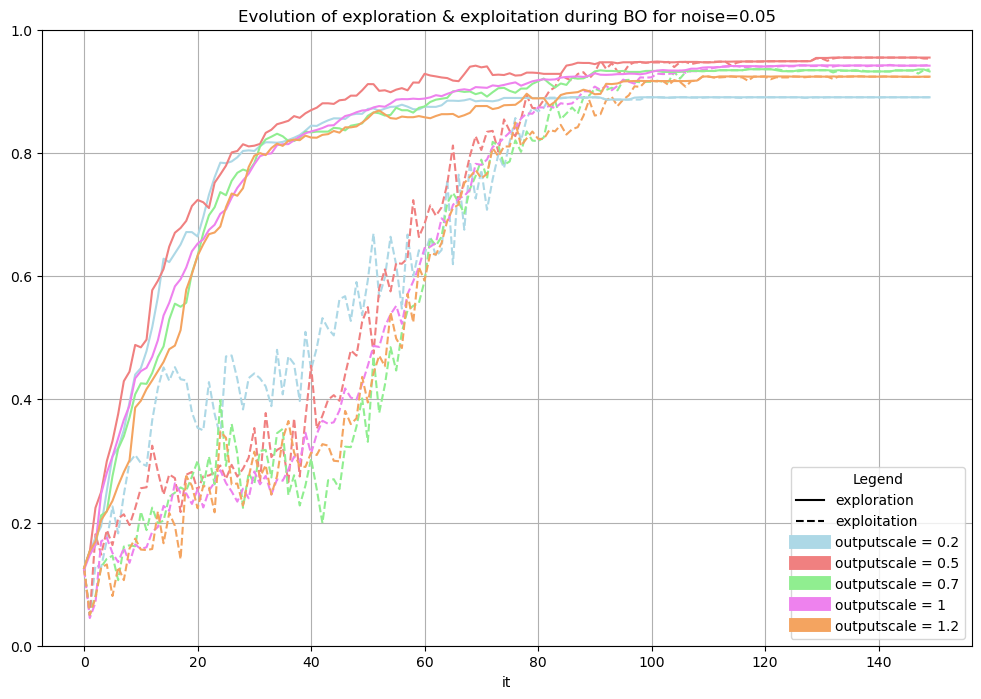

In [11]:

# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown'
}

plt.figure(figsize=(12, 8)) 


plt.plot(pp005_02.exploitation(), color=colors['sim1'], linestyle='--')
plt.plot(pp005_05.exploitation(), color=colors['sim2'], linestyle='--')
plt.plot(pp005_07.exploitation(), color=colors['sim3'], linestyle='--')
plt.plot(pp005_1.exploitation(), color=colors['sim4'], linestyle='--')
plt.plot(pp005_12.exploitation(), color=colors['sim5'], linestyle='--')


plt.plot(pp005_02.exploration(), color=colors['sim1'], linestyle='-')
plt.plot(pp005_05.exploration(), color=colors['sim2'], linestyle='-')
plt.plot(pp005_07.exploration(), color=colors['sim3'], linestyle='-')
plt.plot(pp005_1.exploration(), color=colors['sim4'], linestyle='-')
plt.plot(pp005_12.exploration(), color=colors['sim5'], linestyle='-')


# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')

model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='outputscale = 0.2', linestyle='-', linewidth = '10')
model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='outputscale = 0.5', linestyle='-', linewidth = '10')
model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='outputscale = 0.7', linestyle='-', linewidth = '10')
model6_patch = mlines.Line2D([], [], color=colors['sim4'], label='outputscale = 1', linestyle='-', linewidth = '10')
model7_patch = mlines.Line2D([], [], color=colors['sim5'], label='outputscale = 1.2', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, model1_patch, model2_patch, model3_patch, model6_patch, model7_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO for noise=0.05")
plt.grid()

# Display the plot
plt.show()

outputscale = 1 is correct !

## KAPPA variation 2

In [18]:
pp4 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_KAPPA4.npz')
pp4.load_data(load_hyperparams=True)
pp6 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_KAPPA6.npz')
pp6.load_data(load_hyperparams=True)
pp8 = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_og_KAPPA8.npz')
pp8.load_data(load_hyperparams=True)


ppe1 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_KAPPA1.npz')
ppe1.load_data(load_hyperparams=True)
ppe2 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_KAPPA2.npz')
ppe2.load_data(load_hyperparams=True)
ppe3 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_KAPPA3.npz')
ppe3.load_data(load_hyperparams=True)
ppe4 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_KAPPA4.npz')
ppe4.load_data(load_hyperparams=True)
ppe5 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_KAPPA5.npz')
ppe5.load_data(load_hyperparams=True)
ppe6 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_KAPPA6.npz')
ppe6.load_data(load_hyperparams=True)
ppe7 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_KAPPA7.npz')
ppe7.load_data(load_hyperparams=True)
ppe8 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_KAPPA8.npz')
ppe8.load_data(load_hyperparams=True)

# ppb2 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_blurred_KAPPA2_10rep.npz')
# ppb2.load_data(load_hyperparams=True)
# ppb3 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_blurred_KAPPA3_10rep.npz')
# ppb3.load_data(load_hyperparams=True)
ppb4 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_blurred_KAPPA4_10rep.npz')
ppb4.load_data(load_hyperparams=True)
ppb6 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_blurred_KAPPA6_10rep.npz')
ppb6.load_data(load_hyperparams=True)
ppb8 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_blurred_KAPPA8_10rep.npz')
ppb8.load_data(load_hyperparams=True)
ppb10 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_blurred_KAPPA10_10rep.npz')
ppb10.load_data(load_hyperparams=True)
ppb12 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_blurred_KAPPA12_10rep.npz')
ppb12.load_data(load_hyperparams=True)
ppb14 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_blurred_KAPPA14_10rep.npz')
ppb14.load_data(load_hyperparams=True)


pp05b4 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_blurred05_KAPPA4.npz')
pp05b4.load_data(load_hyperparams=True)
pp05b6 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_blurred05_KAPPA6.npz')
pp05b6.load_data(load_hyperparams=True)
pp05b8 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_blurred05_KAPPA8.npz')
pp05b8.load_data(load_hyperparams=True)


pp025b2 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_blurred025_KAPPA2.npz')
pp025b2.load_data(load_hyperparams=True)
pp025b3 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_blurred025_KAPPA3.npz')
pp025b3.load_data(load_hyperparams=True)
pp025b4 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_blurred025_KAPPA4.npz')
pp025b4.load_data(load_hyperparams=True)

# pp01b2 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_blurred025_KAPPA2.npz')
# pp01b2.load_data(load_hyperparams=True)
pp01b3 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_blurred01_KAPPA3.npz')
pp01b3.load_data(load_hyperparams=True)
pp01b4 = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_test_pseudo_gpy_blurred01_KAPPA4.npz')
pp01b4.load_data(load_hyperparams=True)

nn6 = PostProcessor('results/gpbo_NN_UCB_cebus1_ttest_NN_KAPPA6.npz')
nn6.load_data()
nn8 = PostProcessor('results/gpbo_NN_UCB_cebus1_ttest_NN_KAPPA8.npz')
nn8.load_data()
nn10 = PostProcessor('results/gpbo_NN_UCB_cebus1_ttest_NN_KAPPA10.npz')
nn10.load_data()

nn6v = PostProcessor('results/gpbo_NN_UCB_cebus1_ttest_NN_KAPPA6_valid.npz')
nn6v.load_data()
nn8v = PostProcessor('results/gpbo_NN_UCB_cebus1_ttest_NN_KAPPA8_valid.npz')
nn8v.load_data()
nn10v = PostProcessor('results/gpbo_NN_UCB_cebus1_ttest_NN_KAPPA10_valid.npz')
nn10v.load_data()


nn6_5000it = PostProcessor('results/gpbo_NN_UCB_cebus1_ttest_NN_KAPPA6_mean_5000it.npz')
nn6_5000it.load_data(load_durations=True)
ppe_5000it = PostProcessor('results/gpbo_estimated_gpytorch_UCB_cebus1_ttest_pseudo_gpy_5000it.npz')
ppe_5000it.load_data(load_durations=True)

In [ ]:
ppe_5000it.best_pred_x.shape

(6, 10, 1, 5000)

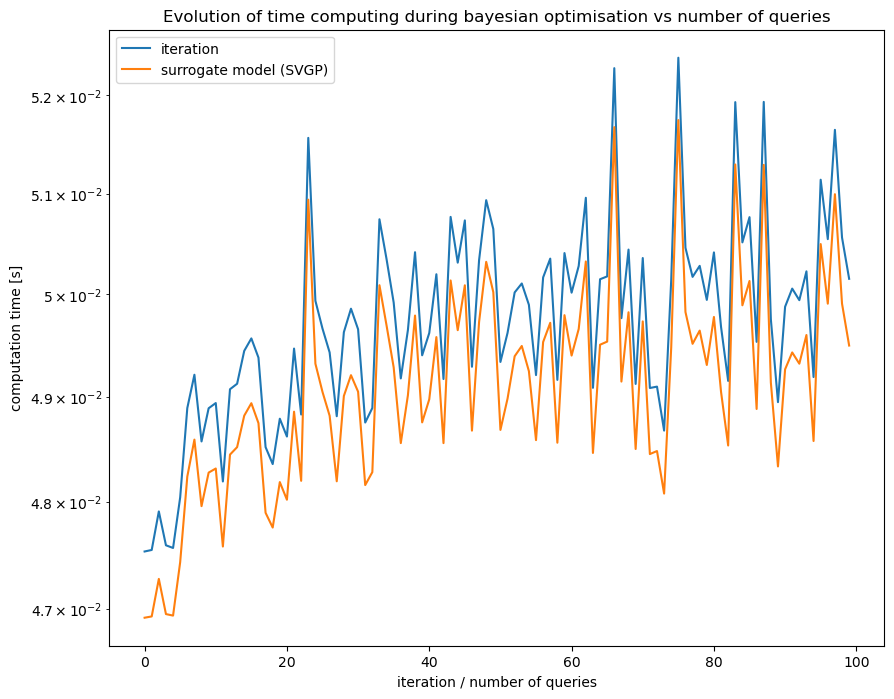

In [36]:
perf_iter, perf_gp, perf_hyp = ppe_5000it.duration_metrics()
plt.figure(figsize=(10,8))
plt.plot(perf_iter[10:110], label='iteration')
plt.plot(perf_gp[10:110], label='surrogate model (SVGP)')
plt.yscale('log')
plt.xlabel('iteration / number of queries')
plt.ylabel('computation time [s]')
plt.legend()
plt.title('Evolution of time computing during bayesian optimisation vs number of queries')
plt.show()

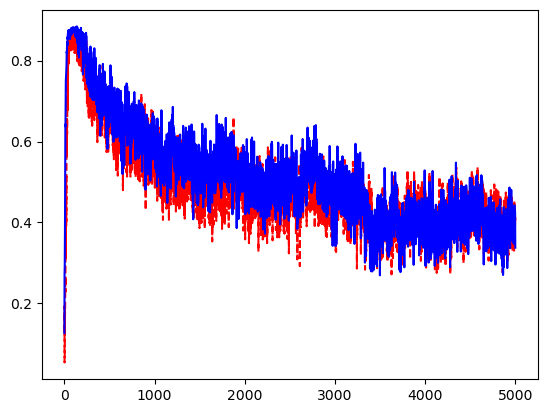

In [98]:
plt.plot(nn6_5000it.exploitation(), color='r', linestyle='--')
plt.plot(nn6_5000it.exploration(measured_location=True), color='b', linestyle='-')

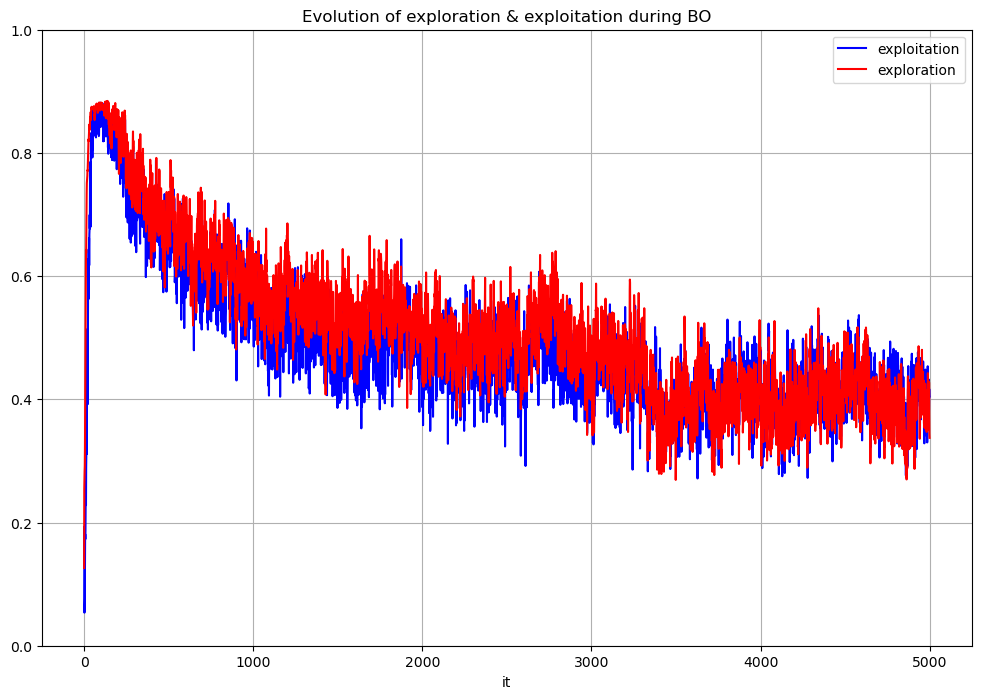

In [142]:
# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'g',#'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown',
    'sim6': 'gold',
    'sim7': 'mediumaquamarine',
    'sim8': 'plum',
    'sim9': 'salmon',
    'sim10': 'lightskyblue'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
# plt.plot(ppe1.exploitation(), color=colors['sim7'], linestyle='--')
plt.plot(nn6_5000it.exploitation(), color='b', linestyle='-', label='exploitation')
# plt.plot(ppe3.exploitation(), color='r', linestyle='--')
# plt.plot(nn6.exploitation(), color=colors['sim1'], linestyle='--')
# plt.plot(nn8.exploitation(), color=colors['sim2'], linestyle='--')
# plt.plot(nn10.exploitation(), color=colors['sim3'], linestyle='--')
# plt.plot(pp025b4.exploitation(), color=colors['sim4'], linestyle='--')
# plt.plot(ppb8.exploitation(), color=colors['sim5'], linestyle='--')
# plt.plot(ppb14.exploitation(), color=colors['sim6'], linestyle='--')



# Plot validation losses 
# plt.plot(ppe1.exploration(measured_location=True), color=colors['sim7'], linestyle='-')
plt.plot(nn6_5000it.exploration(measured_location=True), color='r', linestyle='-', label='exploration')
# plt.plot(ppe3.exploration(measured_location=True), color='r', linestyle='-')
# plt.plot(nn6.exploration(measured_location=True), color=colors['sim1'], linestyle='-')
# plt.plot(nn8.exploration(measured_location=True), color=colors['sim2'], linestyle='-')
# plt.plot(nn10.exploration(measured_location=True), color=colors['sim3'], linestyle='-')
# plt.plot(pp025b4.exploration(measured_location=True), color=colors['sim4'], linestyle='-')
# plt.plot(ppb8.exploration(measured_location=True), color=colors['sim5'], linestyle='-')
# plt.plot(ppb14.exploration(measured_location=True), color=colors['sim6'], linestyle='-')


# Create custom legend entries
# train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
# validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')

# modelb_patch = mlines.Line2D([], [], color='b', label='Simple GP, KAPPA = 6', linestyle='-', linewidth = '10')
# modelr_patch = mlines.Line2D([], [], color='r', label='SVGP not blurred, KAPPA = 3', linestyle='-', linewidth = '10')
# model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='NN, KAPPA = 6', linestyle='-', linewidth = '10')
# model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='NN, KAPPA = 8', linestyle='-', linewidth = '10')
# model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='NN, KAPPA = 10', linestyle='-', linewidth = '10')
# model4_patch = mlines.Line2D([], [], color=colors['sim4'], label='NN, KAPPA = 4 a=0.25', linestyle='-', linewidth = '10')
# model5_patch = mlines.Line2D([], [], color=colors['sim5'], label='KAPPA = 8 a=1', linestyle='-', linewidth = '10')
# model6_patch = mlines.Line2D([], [], color=colors['sim6'], label='KAPPA = 14', linestyle='-', linewidth = '10')
# model7_patch = mlines.Line2D([], [], color=colors['sim7'], label='KAPPA = 1', linestyle='-', linewidth = '10')
# model8_patch = mlines.Line2D([], [], color=colors['sim8'], label='KAPPA = 2', linestyle='-', linewidth = '10')

# Add the legend
plt.legend()

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO")
plt.grid()

# Display the plot
plt.show()

In [101]:
nn6_5000it.P_test_x_idx[0,0,0,-10:]

array([29, 51, 78, 35, 22, 42, 39, 91, 62,  5], dtype=int64)

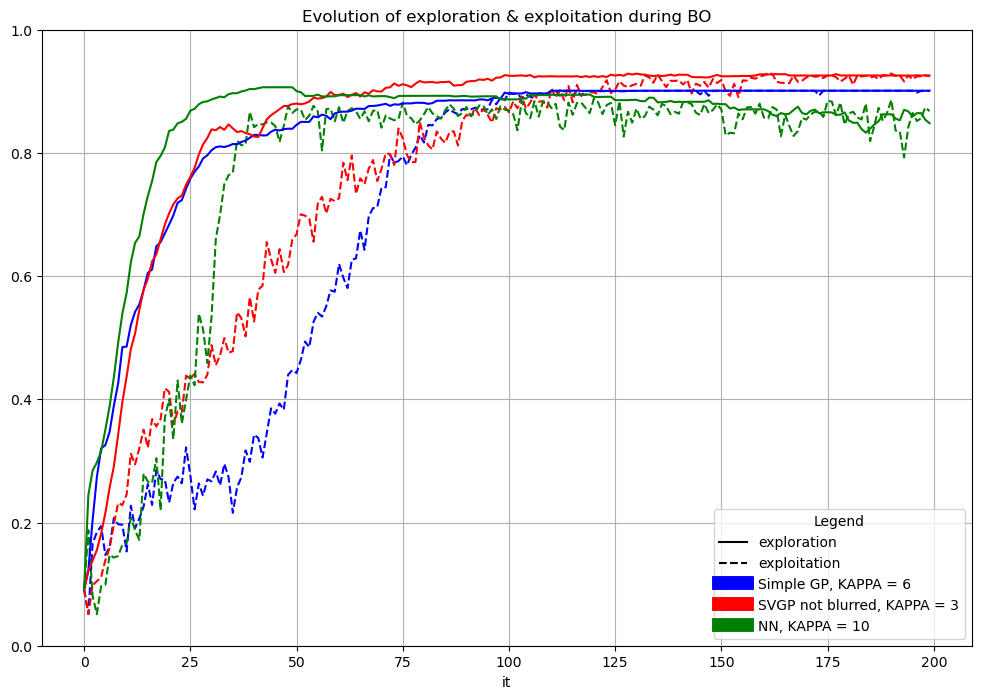

In [141]:
# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'g',#'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown',
    'sim6': 'gold',
    'sim7': 'mediumaquamarine',
    'sim8': 'plum',
    'sim9': 'salmon',
    'sim10': 'lightskyblue'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
# plt.plot(ppe1.exploitation(), color=colors['sim7'], linestyle='--')
plt.plot(pp6.exploitation(), color='b', linestyle='--')
plt.plot(ppe3.exploitation(), color='r', linestyle='--')
# plt.plot(nn6.exploitation(), color=colors['sim1'], linestyle='--')
# plt.plot(nn8.exploitation(), color=colors['sim2'], linestyle='--')
plt.plot(nn10.exploitation(), color=colors['sim3'], linestyle='--')
# plt.plot(pp025b4.exploitation(), color=colors['sim4'], linestyle='--')
# plt.plot(ppb8.exploitation(), color=colors['sim5'], linestyle='--')
# plt.plot(ppb14.exploitation(), color=colors['sim6'], linestyle='--')



# Plot validation losses 
# plt.plot(ppe1.exploration(measured_location=True), color=colors['sim7'], linestyle='-')
plt.plot(pp6.exploration(measured_location=True), color='b', linestyle='-')
plt.plot(ppe3.exploration(measured_location=True), color='r', linestyle='-')
# plt.plot(nn6.exploration(measured_location=True), color=colors['sim1'], linestyle='-')
# plt.plot(nn8.exploration(measured_location=True), color=colors['sim2'], linestyle='-')
plt.plot(nn10.exploration(measured_location=True), color=colors['sim3'], linestyle='-')
# plt.plot(pp025b4.exploration(measured_location=True), color=colors['sim4'], linestyle='-')
# plt.plot(ppb8.exploration(measured_location=True), color=colors['sim5'], linestyle='-')
# plt.plot(ppb14.exploration(measured_location=True), color=colors['sim6'], linestyle='-')


# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')

modelb_patch = mlines.Line2D([], [], color='b', label='Simple GP, KAPPA = 6', linestyle='-', linewidth = '10')
modelr_patch = mlines.Line2D([], [], color='r', label='SVGP not blurred, KAPPA = 3', linestyle='-', linewidth = '10')
# model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='NN, KAPPA = 6', linestyle='-', linewidth = '10')
# model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='NN, KAPPA = 8', linestyle='-', linewidth = '10')
model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='NN, KAPPA = 10', linestyle='-', linewidth = '10')
# model4_patch = mlines.Line2D([], [], color=colors['sim4'], label='NN, KAPPA = 4 a=0.25', linestyle='-', linewidth = '10')
# model5_patch = mlines.Line2D([], [], color=colors['sim5'], label='KAPPA = 8 a=1', linestyle='-', linewidth = '10')
# model6_patch = mlines.Line2D([], [], color=colors['sim6'], label='KAPPA = 14', linestyle='-', linewidth = '10')
# model7_patch = mlines.Line2D([], [], color=colors['sim7'], label='KAPPA = 1', linestyle='-', linewidth = '10')
# model8_patch = mlines.Line2D([], [], color=colors['sim8'], label='KAPPA = 2', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, modelb_patch, modelr_patch, model3_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO")
plt.grid()

# Display the plot
plt.show()

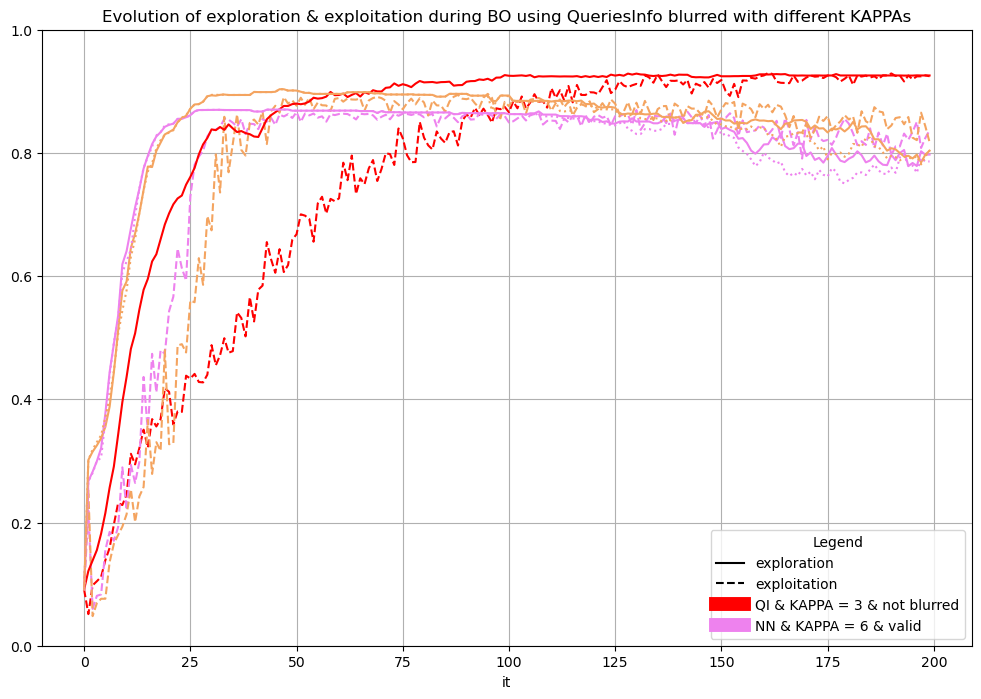

In [6]:
# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown',
    'sim6': 'gold',
    'sim7': 'mediumaquamarine',
    'sim8': 'plum',
    'sim9': 'salmon',
    'sim10': 'lightskyblue'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
# plt.plot(ppe1.exploitation(), color=colors['sim7'], linestyle='--')
# plt.plot(ppb2.exploitation(), color=colors['sim8'], linestyle='--')
plt.plot(ppe3.exploitation(), color='r', linestyle='--')
# plt.plot(nn6.exploitation(), color=colors['sim1'], linestyle='--')
# plt.plot(nn8.exploitation(), color=colors['sim2'], linestyle='--')
# plt.plot(nn10.exploitation(), color=colors['sim3'], linestyle='--')
plt.plot(nn6.exploitation(), color=colors['sim4'], linestyle='--')
plt.plot(nn8.exploitation(), color=colors['sim5'], linestyle='--')
# plt.plot(nn10v.exploitation(), color=colors['sim6'], linestyle='--')



# Plot validation losses 
# plt.plot(ppe1.exploration(), color=colors['sim7'], linestyle='-')
# plt.plot(ppb2.exploration(), color=colors['sim8'], linestyle='-')
plt.plot(ppe3.exploration(measured_location=True), color='r', linestyle='-')
# plt.plot(nn6.exploration(measured_location=True), color=colors['sim1'], linestyle='-')
# plt.plot(nn8.exploration(measured_location=True), color=colors['sim2'], linestyle='-')
# plt.plot(nn10.exploration(measured_location=True), color=colors['sim3'], linestyle='-')
plt.plot(nn6.exploration(measured_location=True), color=colors['sim4'], linestyle='-')
plt.plot(nn8.exploration(measured_location=True), color=colors['sim5'], linestyle='-')
plt.plot(nn6.exploration(measured_location=False), color=colors['sim4'], linestyle=':')
plt.plot(nn8.exploration(measured_location=False), color=colors['sim5'], linestyle=':')
# plt.plot(nn10v.exploration(measured_location=True), color=colors['sim6'], linestyle='-')


# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')


modelr_patch = mlines.Line2D([], [], color='r', label='QI & KAPPA = 3 & not blurred', linestyle='-', linewidth = '10')
# model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='NN & KAPPA = 6', linestyle='-', linewidth = '10')
# model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='NN & KAPPA = 8', linestyle='-', linewidth = '10')
# model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='NN & KAPPA = 10', linestyle='-', linewidth = '10')
model4_patch = mlines.Line2D([], [], color=colors['sim4'], label='NN & KAPPA = 6 & valid', linestyle='-', linewidth = '10')
# model5_patch = mlines.Line2D([], [], color=colors['sim5'], label='NN & KAPPA = 8 & valid', linestyle='-', linewidth = '10')
# model6_patch = mlines.Line2D([], [], color=colors['sim6'], label='NN & KAPPA = 10 & valid', linestyle='-', linewidth = '10')
# model7_patch = mlines.Line2D([], [], color=colors['sim7'], label='KAPPA = 1', linestyle='-', linewidth = '10')
# model8_patch = mlines.Line2D([], [], color=colors['sim8'], label='KAPPA = 2', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, modelr_patch, model4_patch],# model2_patch, model3_patch, model4_patch, model5_patch, model6_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO using QueriesInfo blurred with different KAPPAs")
plt.grid()

# Display the plot
plt.show()

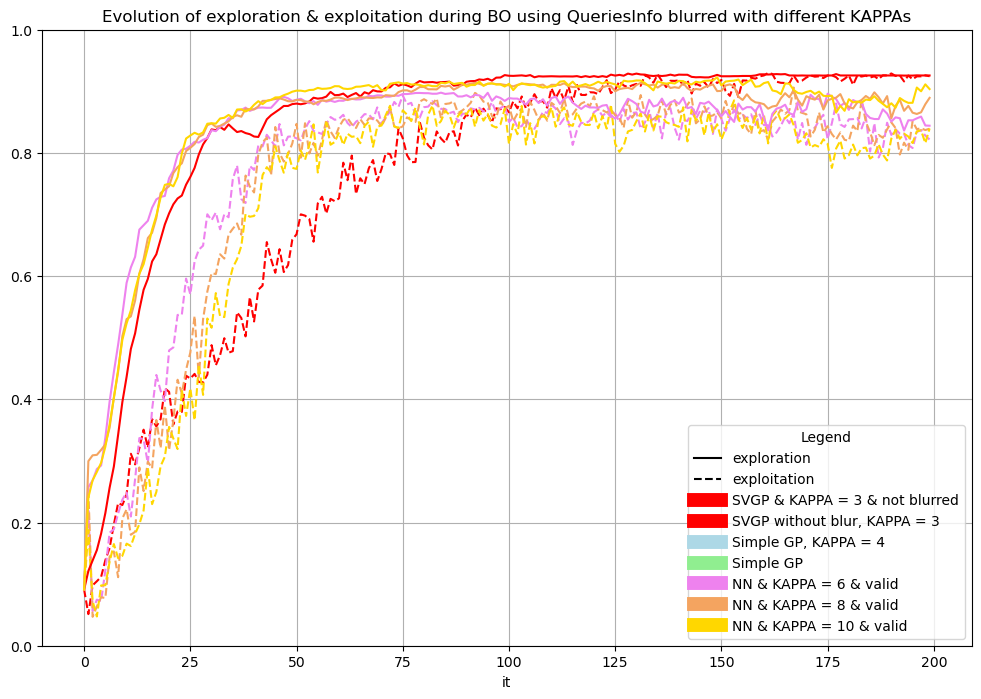

In [131]:
# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown',
    'sim6': 'gold',
    'sim7': 'mediumaquamarine',
    'sim8': 'plum',
    'sim9': 'salmon',
    'sim10': 'lightskyblue'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
# plt.plot(ppe1.exploitation(), color=colors['sim7'], linestyle='--')
# plt.plot(ppb2.exploitation(), color=colors['sim8'], linestyle='--')
plt.plot(ppe3.exploitation(), color='r', linestyle='--')
# plt.plot(nn6.exploitation(), color=colors['sim1'], linestyle='--')
# plt.plot(nn8.exploitation(), color=colors['sim2'], linestyle='--')
# plt.plot(nn10.exploitation(), color=colors['sim3'], linestyle='--')
plt.plot(nn6v.exploitation(), color=colors['sim4'], linestyle='--')
plt.plot(nn8v.exploitation(), color=colors['sim5'], linestyle='--')
plt.plot(nn10v.exploitation(), color=colors['sim6'], linestyle='--')



# Plot validation losses 
# plt.plot(ppe1.exploration(measured_location=True), color=colors['sim7'], linestyle='-')
# plt.plot(ppb2.exploration(measured_location=True), color=colors['sim8'], linestyle='-')
plt.plot(ppe3.exploration(measured_location=True), color='r', linestyle='-')
# plt.plot(nn6.exploration(measured_location=True), color=colors['sim1'], linestyle='-')
# plt.plot(nn8.exploration(measured_location=True), color=colors['sim2'], linestyle='-')
# plt.plot(nn10.exploration(measured_location=True), color=colors['sim3'], linestyle='-')
plt.plot(nn6v.exploration(measured_location=True), color=colors['sim4'], linestyle='-')
plt.plot(nn8v.exploration(measured_location=True), color=colors['sim5'], linestyle='-')
plt.plot(nn10v.exploration(measured_location=True), color=colors['sim6'], linestyle='-')


# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')


modelr_patch = mlines.Line2D([], [], color='r', label='SVGP & KAPPA = 3 & not blurred', linestyle='-', linewidth = '10')
# model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='NN & KAPPA = 6', linestyle='-', linewidth = '10')
# model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='NN & KAPPA = 8', linestyle='-', linewidth = '10')
# model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='NN & KAPPA = 10', linestyle='-', linewidth = '10')
model4_patch = mlines.Line2D([], [], color=colors['sim4'], label='NN & KAPPA = 6 & valid', linestyle='-', linewidth = '10')
model5_patch = mlines.Line2D([], [], color=colors['sim5'], label='NN & KAPPA = 8 & valid', linestyle='-', linewidth = '10')
model6_patch = mlines.Line2D([], [], color=colors['sim6'], label='NN & KAPPA = 10 & valid', linestyle='-', linewidth = '10')
# model7_patch = mlines.Line2D([], [], color=colors['sim7'], label='KAPPA = 1', linestyle='-', linewidth = '10')
# model8_patch = mlines.Line2D([], [], color=colors['sim8'], label='KAPPA = 2', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, modelr_patch, model1_patch, model2_patch, model3_patch, model4_patch, model5_patch, model6_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO using QueriesInfo blurred with different KAPPAs")
plt.grid()

# Display the plot
plt.show()

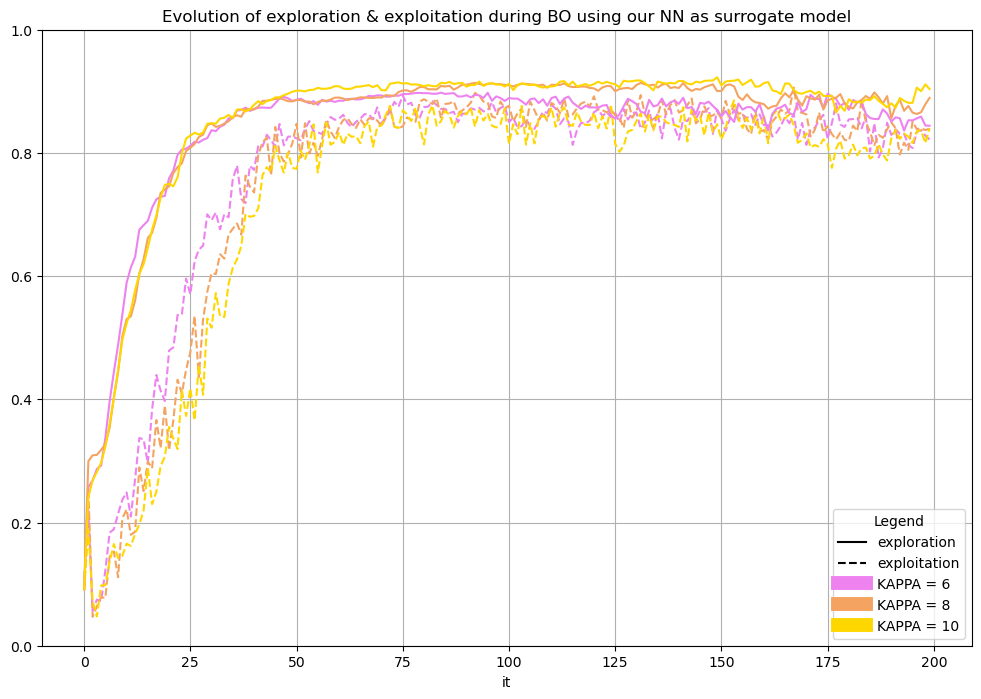

In [135]:
# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown',
    'sim6': 'gold',
    'sim7': 'mediumaquamarine',
    'sim8': 'plum',
    'sim9': 'salmon',
    'sim10': 'lightskyblue'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
# plt.plot(ppe1.exploitation(), color=colors['sim7'], linestyle='--')
# plt.plot(ppb2.exploitation(), color=colors['sim8'], linestyle='--')
# plt.plot(ppe3.exploitation(), color='r', linestyle='--')
# plt.plot(nn6.exploitation(), color=colors['sim1'], linestyle='--')
# plt.plot(nn8.exploitation(), color=colors['sim2'], linestyle='--')
# plt.plot(nn10.exploitation(), color=colors['sim3'], linestyle='--')
plt.plot(nn6v.exploitation(), color=colors['sim4'], linestyle='--')
plt.plot(nn8v.exploitation(), color=colors['sim5'], linestyle='--')
plt.plot(nn10v.exploitation(), color=colors['sim6'], linestyle='--')



# Plot validation losses 
# plt.plot(ppe1.exploration(measured_location=True), color=colors['sim7'], linestyle='-')
# plt.plot(ppb2.exploration(measured_location=True), color=colors['sim8'], linestyle='-')
# plt.plot(ppe3.exploration(measured_location=True), color='r', linestyle='-')
# plt.plot(nn6.exploration(measured_location=True), color=colors['sim1'], linestyle='-')
# plt.plot(nn8.exploration(measured_location=True), color=colors['sim2'], linestyle='-')
# plt.plot(nn10.exploration(measured_location=True), color=colors['sim3'], linestyle='-')
plt.plot(nn6v.exploration(measured_location=True), color=colors['sim4'], linestyle='-')
plt.plot(nn8v.exploration(measured_location=True), color=colors['sim5'], linestyle='-')
plt.plot(nn10v.exploration(measured_location=True), color=colors['sim6'], linestyle='-')


# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')


# modelr_patch = mlines.Line2D([], [], color='r', label='SVGP & KAPPA = 3 & not blurred', linestyle='-', linewidth = '10')
# model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='NN & KAPPA = 6', linestyle='-', linewidth = '10')
# model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='NN & KAPPA = 8', linestyle='-', linewidth = '10')
# model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='NN & KAPPA = 10', linestyle='-', linewidth = '10')
model4_patch = mlines.Line2D([], [], color=colors['sim4'], label='KAPPA = 6', linestyle='-', linewidth = '10')
model5_patch = mlines.Line2D([], [], color=colors['sim5'], label='KAPPA = 8', linestyle='-', linewidth = '10')
model6_patch = mlines.Line2D([], [], color=colors['sim6'], label='KAPPA = 10', linestyle='-', linewidth = '10')
# model7_patch = mlines.Line2D([], [], color=colors['sim7'], label='KAPPA = 1', linestyle='-', linewidth = '10')
# model8_patch = mlines.Line2D([], [], color=colors['sim8'], label='KAPPA = 2', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, model4_patch, model5_patch, model6_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO using our NN as surrogate model")
plt.grid()

# Display the plot
plt.show()

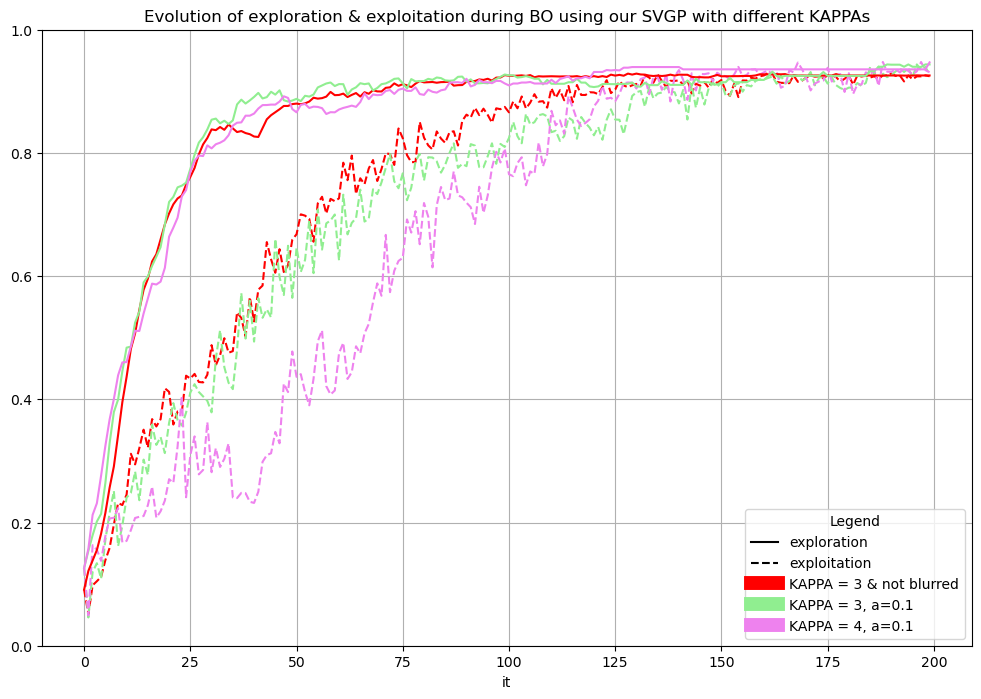

In [112]:
# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown',
    'sim6': 'gold',
    'sim7': 'mediumaquamarine',
    'sim8': 'plum',
    'sim9': 'salmon',
    'sim10': 'lightskyblue'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
# plt.plot(ppe1.exploitation(), color=colors['sim7'], linestyle='--')
# plt.plot(ppb2.exploitation(), color=colors['sim8'], linestyle='--')
plt.plot(ppe3.exploitation(), color='r', linestyle='--')
# plt.plot(pp05b4.exploitation(), color=colors['sim1'], linestyle='--')
# plt.plot(pp01b2.exploitation(), color=colors['sim2'], linestyle='--')
plt.plot(pp01b3.exploitation(), color=colors['sim3'], linestyle='--')
plt.plot(pp01b4.exploitation(), color=colors['sim4'], linestyle='--')
# plt.plot(ppb8.exploitation(), color=colors['sim5'], linestyle='--')
# plt.plot(ppb14.exploitation(), color=colors['sim6'], linestyle='--')



# Plot validation losses 
# plt.plot(ppe1.exploration(measured_location=True), color=colors['sim7'], linestyle='-')
# plt.plot(ppb2.exploration(measured_location=True), color=colors['sim8'], linestyle='-')
plt.plot(ppe3.exploration(measured_location=True), color='r', linestyle='-')
# plt.plot(pp05b4.exploration(measured_location=True), color=colors['sim1'], linestyle='-')
# plt.plot(pp01b2.exploration(measured_location=True), color=colors['sim2'], linestyle='-')
plt.plot(pp01b3.exploration(measured_location=True), color=colors['sim3'], linestyle='-')
plt.plot(pp01b4.exploration(measured_location=True), color=colors['sim4'], linestyle='-')
# plt.plot(ppb8.exploration(measured_location=True), color=colors['sim5'], linestyle='-')
# plt.plot(ppb14.exploration(measured_location=True), color=colors['sim6'], linestyle='-')


# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')


modelr_patch = mlines.Line2D([], [], color='r', label='KAPPA = 3 & not blurred', linestyle='-', linewidth = '10')
# model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='KAPPA = 4 a=0.5', linestyle='-', linewidth = '10')
# model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='KAPPA = 2 a=0.1', linestyle='-', linewidth = '10')
model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='KAPPA = 3, a=0.1', linestyle='-', linewidth = '10')
model4_patch = mlines.Line2D([], [], color=colors['sim4'], label='KAPPA = 4, a=0.1', linestyle='-', linewidth = '10')
# model5_patch = mlines.Line2D([], [], color=colors['sim5'], label='KAPPA = 8 a=1', linestyle='-', linewidth = '10')
# model6_patch = mlines.Line2D([], [], color=colors['sim6'], label='KAPPA = 14', linestyle='-', linewidth = '10')
# model7_patch = mlines.Line2D([], [], color=colors['sim7'], label='KAPPA = 1', linestyle='-', linewidth = '10')
# model8_patch = mlines.Line2D([], [], color=colors['sim8'], label='KAPPA = 2', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, modelr_patch, model3_patch, model4_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO using our SVGP with different KAPPAs")
plt.grid()

# Display the plot
plt.show()

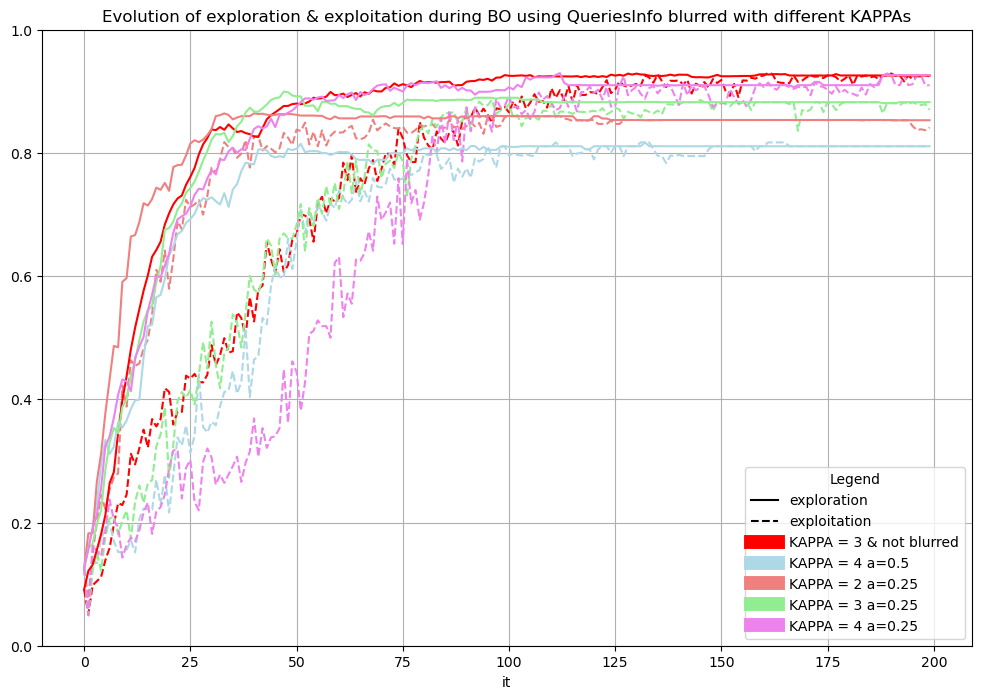

In [ ]:
# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown',
    'sim6': 'gold',
    'sim7': 'mediumaquamarine',
    'sim8': 'plum',
    'sim9': 'salmon',
    'sim10': 'lightskyblue'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
# plt.plot(ppe1.exploitation(), color=colors['sim7'], linestyle='--')
# plt.plot(ppb2.exploitation(), color=colors['sim8'], linestyle='--')
plt.plot(ppe3.exploitation(), color='r', linestyle='--')
plt.plot(pp05b4.exploitation(), color=colors['sim1'], linestyle='--')
plt.plot(pp025b2.exploitation(), color=colors['sim2'], linestyle='--')
plt.plot(pp025b3.exploitation(), color=colors['sim3'], linestyle='--')
plt.plot(pp025b4.exploitation(), color=colors['sim4'], linestyle='--')
# plt.plot(ppb8.exploitation(), color=colors['sim5'], linestyle='--')
# plt.plot(ppb14.exploitation(), color=colors['sim6'], linestyle='--')



# Plot validation losses 
# plt.plot(ppe1.exploration(measured_location=True), color=colors['sim7'], linestyle='-')
# plt.plot(ppb2.exploration(measured_location=True), color=colors['sim8'], linestyle='-')
plt.plot(ppe3.exploration(measured_location=True), color='r', linestyle='-')
plt.plot(pp05b4.exploration(measured_location=True), color=colors['sim1'], linestyle='-')
plt.plot(pp025b2.exploration(measured_location=True), color=colors['sim2'], linestyle='-')
plt.plot(pp025b3.exploration(measured_location=True), color=colors['sim3'], linestyle='-')
plt.plot(pp025b4.exploration(measured_location=True), color=colors['sim4'], linestyle='-')
# plt.plot(ppb8.exploration(measured_location=True), color=colors['sim5'], linestyle='-')
# plt.plot(ppb14.exploration(measured_location=True), color=colors['sim6'], linestyle='-')


# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')


modelr_patch = mlines.Line2D([], [], color='r', label='KAPPA = 3 & not blurred', linestyle='-', linewidth = '10')
model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='KAPPA = 4 a=0.5', linestyle='-', linewidth = '10')
model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='KAPPA = 2 a=0.25', linestyle='-', linewidth = '10')
model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='KAPPA = 3 a=0.25', linestyle='-', linewidth = '10')
model4_patch = mlines.Line2D([], [], color=colors['sim4'], label='KAPPA = 4 a=0.25', linestyle='-', linewidth = '10')
# model5_patch = mlines.Line2D([], [], color=colors['sim5'], label='KAPPA = 8 a=1', linestyle='-', linewidth = '10')
# model6_patch = mlines.Line2D([], [], color=colors['sim6'], label='KAPPA = 14', linestyle='-', linewidth = '10')
# model7_patch = mlines.Line2D([], [], color=colors['sim7'], label='KAPPA = 1', linestyle='-', linewidth = '10')
# model8_patch = mlines.Line2D([], [], color=colors['sim8'], label='KAPPA = 2', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, modelr_patch, model1_patch, model2_patch, model3_patch, model4_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO using QueriesInfo blurred with different KAPPAs")
plt.grid()

# Display the plot
plt.show()

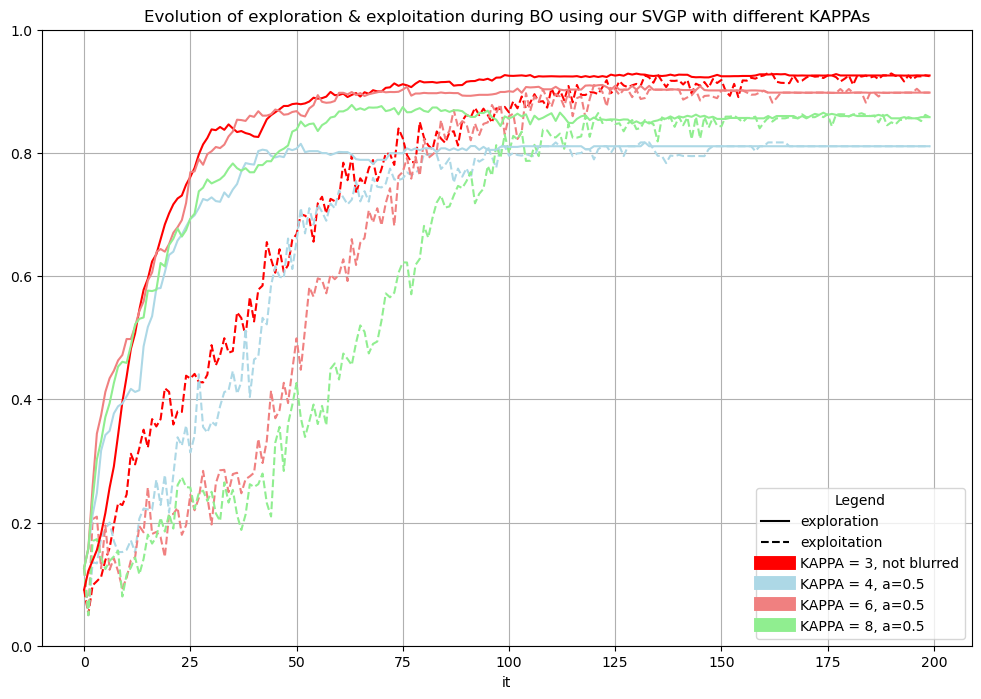

In [113]:
# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown',
    'sim6': 'gold',
    'sim7': 'mediumaquamarine',
    'sim8': 'plum',
    'sim9': 'salmon',
    'sim10': 'lightskyblue'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
# plt.plot(ppe1.exploitation(), color=colors['sim7'], linestyle='--')
# plt.plot(ppb2.exploitation(), color=colors['sim8'], linestyle='--')
plt.plot(ppe3.exploitation(), color='r', linestyle='--')
plt.plot(pp05b4.exploitation(), color=colors['sim1'], linestyle='--')
plt.plot(pp05b6.exploitation(), color=colors['sim2'], linestyle='--')
plt.plot(pp05b8.exploitation(), color=colors['sim3'], linestyle='--')
# plt.plot(pp025b4.exploitation(), color=colors['sim4'], linestyle='--')
# plt.plot(ppb8.exploitation(), color=colors['sim5'], linestyle='--')
# plt.plot(ppb14.exploitation(), color=colors['sim6'], linestyle='--')



# Plot validation losses 
# plt.plot(ppe1.exploration(measured_location=True), color=colors['sim7'], linestyle='-')
# plt.plot(ppb2.exploration(measured_location=True), color=colors['sim8'], linestyle='-')
plt.plot(ppe3.exploration(measured_location=True), color='r', linestyle='-')
plt.plot(pp05b4.exploration(measured_location=True), color=colors['sim1'], linestyle='-')
plt.plot(pp05b6.exploration(measured_location=True), color=colors['sim2'], linestyle='-')
plt.plot(pp05b8.exploration(measured_location=True), color=colors['sim3'], linestyle='-')
# plt.plot(pp025b4.exploration(measured_location=True), color=colors['sim4'], linestyle='-')
# plt.plot(ppb8.exploration(measured_location=True), color=colors['sim5'], linestyle='-')
# plt.plot(ppb14.exploration(measured_location=True), color=colors['sim6'], linestyle='-')


# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')


modelr_patch = mlines.Line2D([], [], color='r', label='KAPPA = 3, not blurred', linestyle='-', linewidth = '10')
model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='KAPPA = 4, a=0.5', linestyle='-', linewidth = '10')
model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='KAPPA = 6, a=0.5', linestyle='-', linewidth = '10')
model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='KAPPA = 8, a=0.5', linestyle='-', linewidth = '10')
# model4_patch = mlines.Line2D([], [], color=colors['sim4'], label='KAPPA = 4 a=0.25', linestyle='-', linewidth = '10')
# model5_patch = mlines.Line2D([], [], color=colors['sim5'], label='KAPPA = 8 a=1', linestyle='-', linewidth = '10')
# model6_patch = mlines.Line2D([], [], color=colors['sim6'], label='KAPPA = 14', linestyle='-', linewidth = '10')
# model7_patch = mlines.Line2D([], [], color=colors['sim7'], label='KAPPA = 1', linestyle='-', linewidth = '10')
# model8_patch = mlines.Line2D([], [], color=colors['sim8'], label='KAPPA = 2', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, modelr_patch, model1_patch, model2_patch, model3_patch], #model4_patch, model5_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO using our SVGP with different KAPPAs")
plt.grid()

# Display the plot
plt.show()

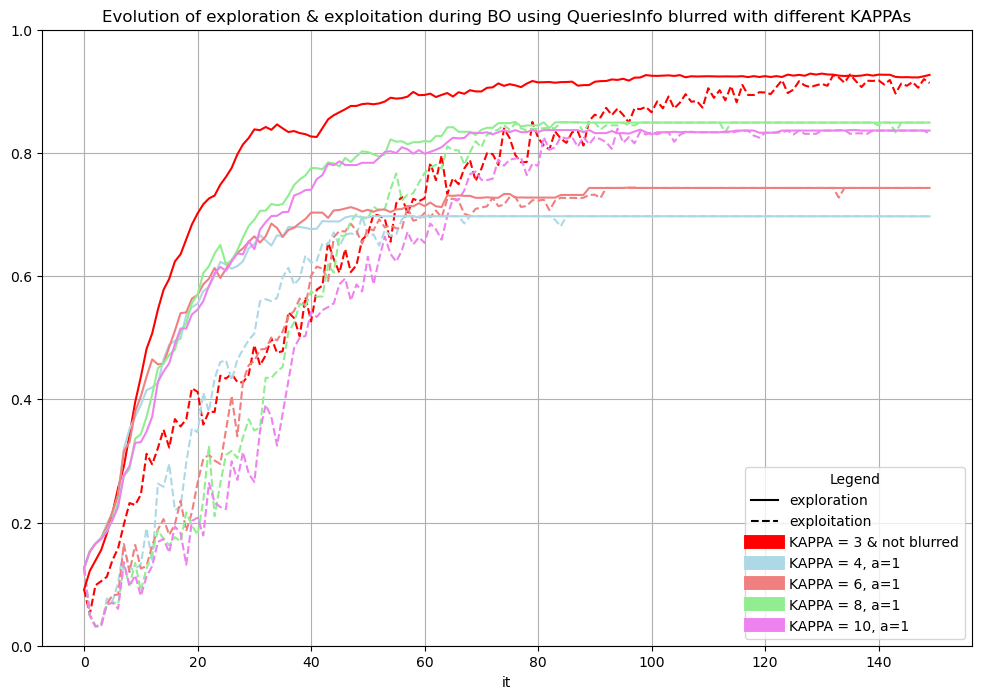

In [114]:

# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown',
    'sim6': 'gold',
    'sim7': 'mediumaquamarine',
    'sim8': 'plum',
    'sim9': 'salmon',
    'sim10': 'lightskyblue'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
# plt.plot(ppe1.exploitation(), color=colors['sim7'], linestyle='--')
# plt.plot(ppb2.exploitation(), color=colors['sim8'], linestyle='--')
plt.plot(ppe3.exploitation()[:150], color='r', linestyle='--')
plt.plot(ppb4.exploitation(), color=colors['sim1'], linestyle='--')
plt.plot(ppb6.exploitation(), color=colors['sim2'], linestyle='--')
plt.plot(ppb8.exploitation(), color=colors['sim3'], linestyle='--')
plt.plot(ppb10.exploitation(), color=colors['sim4'], linestyle='--')
# plt.plot(ppb12.exploitation(), color=colors['sim5'], linestyle='--')
# plt.plot(ppb14.exploitation(), color=colors['sim6'], linestyle='--')



# Plot validation losses 
# plt.plot(ppe1.exploration(measured_location=True), color=colors['sim7'], linestyle='-')
# plt.plot(ppb2.exploration(measured_location=True), color=colors['sim8'], linestyle='-')
plt.plot(ppe3.exploration(measured_location=True)[:150], color='r', linestyle='-')
plt.plot(ppb4.exploration(measured_location=True), color=colors['sim1'], linestyle='-')
plt.plot(ppb6.exploration(measured_location=True), color=colors['sim2'], linestyle='-')
plt.plot(ppb8.exploration(measured_location=True), color=colors['sim3'], linestyle='-')
plt.plot(ppb10.exploration(measured_location=True), color=colors['sim4'], linestyle='-')
# plt.plot(ppb12.exploration(measured_location=True), color=colors['sim5'], linestyle='-')
# plt.plot(ppb14.exploration(measured_location=True), color=colors['sim6'], linestyle='-')


# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')


modelr_patch = mlines.Line2D([], [], color='r', label='KAPPA = 3 & not blurred', linestyle='-', linewidth = '10')
model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='KAPPA = 4, a=1', linestyle='-', linewidth = '10')
model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='KAPPA = 6, a=1', linestyle='-', linewidth = '10')
model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='KAPPA = 8, a=1', linestyle='-', linewidth = '10')
model4_patch = mlines.Line2D([], [], color=colors['sim4'], label='KAPPA = 10, a=1', linestyle='-', linewidth = '10')
# model5_patch = mlines.Line2D([], [], color=colors['sim5'], label='KAPPA = 12', linestyle='-', linewidth = '10')
# model6_patch = mlines.Line2D([], [], color=colors['sim6'], label='KAPPA = 14', linestyle='-', linewidth = '10')
# model7_patch = mlines.Line2D([], [], color=colors['sim7'], label='KAPPA = 1', linestyle='-', linewidth = '10')
# model8_patch = mlines.Line2D([], [], color=colors['sim8'], label='KAPPA = 2', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, modelr_patch, model1_patch, model2_patch, model3_patch, model4_patch],# model5_patch, model6_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO using QueriesInfo blurred with different KAPPAs")
plt.grid()

# Display the plot
plt.show()

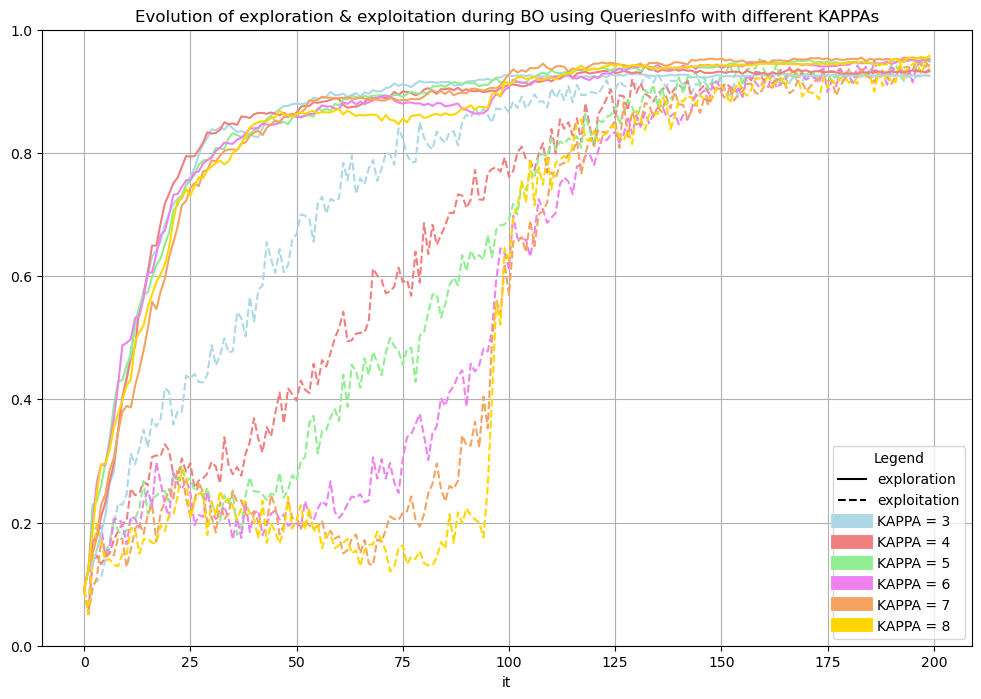

In [ ]:

# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown',
    'sim6': 'gold',
    'sim7': 'mediumaquamarine',
    'sim8': 'plum',
    'sim9': 'salmon',
    'sim10': 'lightskyblue'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
# plt.plot(ppe1.exploitation(), color=colors['sim7'], linestyle='--')
# plt.plot(ppe2.exploitation(), color=colors['sim8'], linestyle='--')
plt.plot(ppe3.exploitation(), color=colors['sim1'], linestyle='--')
plt.plot(ppe4.exploitation(), color=colors['sim2'], linestyle='--')
plt.plot(ppe5.exploitation(), color=colors['sim3'], linestyle='--')
plt.plot(ppe6.exploitation(), color=colors['sim4'], linestyle='--')
plt.plot(ppe7.exploitation(), color=colors['sim5'], linestyle='--')
plt.plot(ppe8.exploitation(), color=colors['sim6'], linestyle='--')



# Plot validation losses 
# plt.plot(ppe1.exploration(measured_location=True), color=colors['sim7'], linestyle='-')
# plt.plot(ppe2.exploration(measured_location=True), color=colors['sim8'], linestyle='-')
plt.plot(ppe3.exploration(measured_location=True), color=colors['sim1'], linestyle='-')
plt.plot(ppe4.exploration(measured_location=True), color=colors['sim2'], linestyle='-')
plt.plot(ppe5.exploration(measured_location=True), color=colors['sim3'], linestyle='-')
plt.plot(ppe6.exploration(measured_location=True), color=colors['sim4'], linestyle='-')
plt.plot(ppe7.exploration(measured_location=True), color=colors['sim5'], linestyle='-')
plt.plot(ppe8.exploration(measured_location=True), color=colors['sim6'], linestyle='-')


# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')


model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='KAPPA = 3', linestyle='-', linewidth = '10')
model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='KAPPA = 4', linestyle='-', linewidth = '10')
model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='KAPPA = 5', linestyle='-', linewidth = '10')
model4_patch = mlines.Line2D([], [], color=colors['sim4'], label='KAPPA = 6', linestyle='-', linewidth = '10')
model5_patch = mlines.Line2D([], [], color=colors['sim5'], label='KAPPA = 7', linestyle='-', linewidth = '10')
model6_patch = mlines.Line2D([], [], color=colors['sim6'], label='KAPPA = 8', linestyle='-', linewidth = '10')
model7_patch = mlines.Line2D([], [], color=colors['sim7'], label='KAPPA = 1', linestyle='-', linewidth = '10')
model8_patch = mlines.Line2D([], [], color=colors['sim8'], label='KAPPA = 2', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, model1_patch, model2_patch, model3_patch, model4_patch, model5_patch, model6_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO using QueriesInfo with different KAPPAs")
plt.grid()

# Display the plot
plt.show()

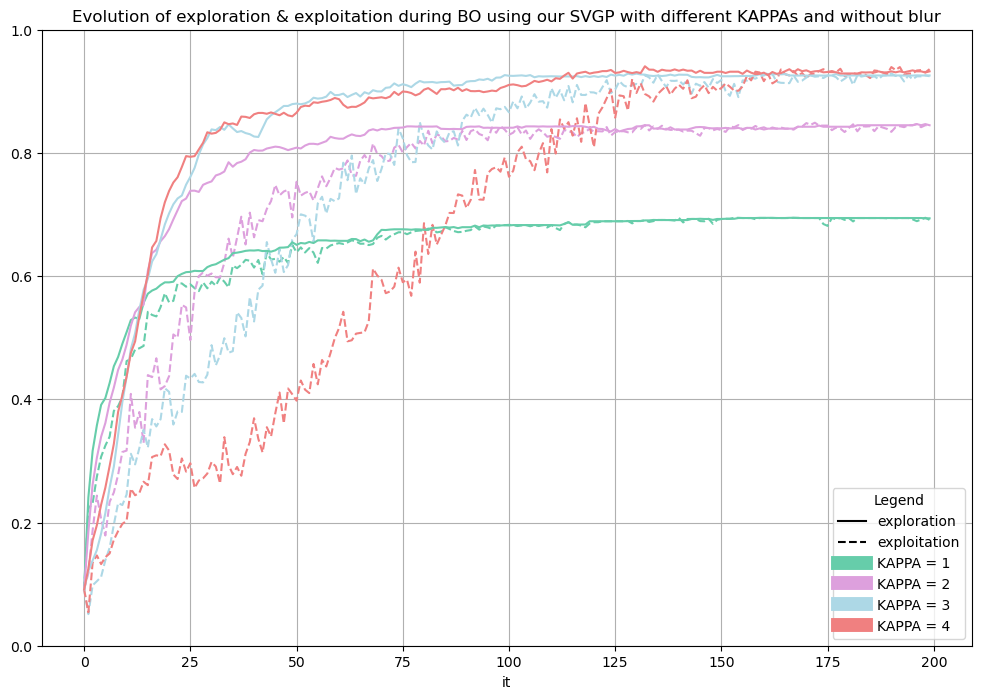

In [104]:
# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown',
    'sim6': 'gold',
    'sim7': 'mediumaquamarine',
    'sim8': 'plum',
    'sim9': 'salmon',
    'sim10': 'lightskyblue'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
plt.plot(ppe1.exploitation(), color=colors['sim7'], linestyle='--')
plt.plot(ppe2.exploitation(), color=colors['sim8'], linestyle='--')
plt.plot(ppe3.exploitation(), color=colors['sim1'], linestyle='--')
plt.plot(ppe4.exploitation(), color=colors['sim2'], linestyle='--')
# plt.plot(ppe5.exploitation(), color=colors['sim3'], linestyle='--')
# plt.plot(ppe6.exploitation(), color=colors['sim4'], linestyle='--')
# plt.plot(ppe7.exploitation(), color=colors['sim5'], linestyle='--')
# plt.plot(ppe8.exploitation(), color=colors['sim6'], linestyle='--')



# Plot validation losses 
plt.plot(ppe1.exploration(measured_location=True), color=colors['sim7'], linestyle='-')
plt.plot(ppe2.exploration(measured_location=True), color=colors['sim8'], linestyle='-')
plt.plot(ppe3.exploration(measured_location=True), color=colors['sim1'], linestyle='-')
plt.plot(ppe4.exploration(measured_location=True), color=colors['sim2'], linestyle='-')
# plt.plot(ppe5.exploration(measured_location=True), color=colors['sim3'], linestyle='-')
# plt.plot(ppe6.exploration(measured_location=True), color=colors['sim4'], linestyle='-')
# plt.plot(ppe7.exploration(measured_location=True), color=colors['sim5'], linestyle='-')
# plt.plot(ppe8.exploration(measured_location=True), color=colors['sim6'], linestyle='-')


# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')


model1_patch = mlines.Line2D([], [], color=colors['sim1'], label='KAPPA = 3', linestyle='-', linewidth = '10')
model2_patch = mlines.Line2D([], [], color=colors['sim2'], label='KAPPA = 4', linestyle='-', linewidth = '10')
# model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='KAPPA = 5', linestyle='-', linewidth = '10')
# model4_patch = mlines.Line2D([], [], color=colors['sim4'], label='KAPPA = 6', linestyle='-', linewidth = '10')
# model5_patch = mlines.Line2D([], [], color=colors['sim5'], label='KAPPA = 7', linestyle='-', linewidth = '10')
# model6_patch = mlines.Line2D([], [], color=colors['sim6'], label='KAPPA = 8', linestyle='-', linewidth = '10')
model7_patch = mlines.Line2D([], [], color=colors['sim7'], label='KAPPA = 1', linestyle='-', linewidth = '10')
model8_patch = mlines.Line2D([], [], color=colors['sim8'], label='KAPPA = 2', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, model7_patch, model8_patch, model1_patch, model2_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO using our SVGP with different KAPPAs and without blur")
plt.grid()

# Display the plot
plt.show()

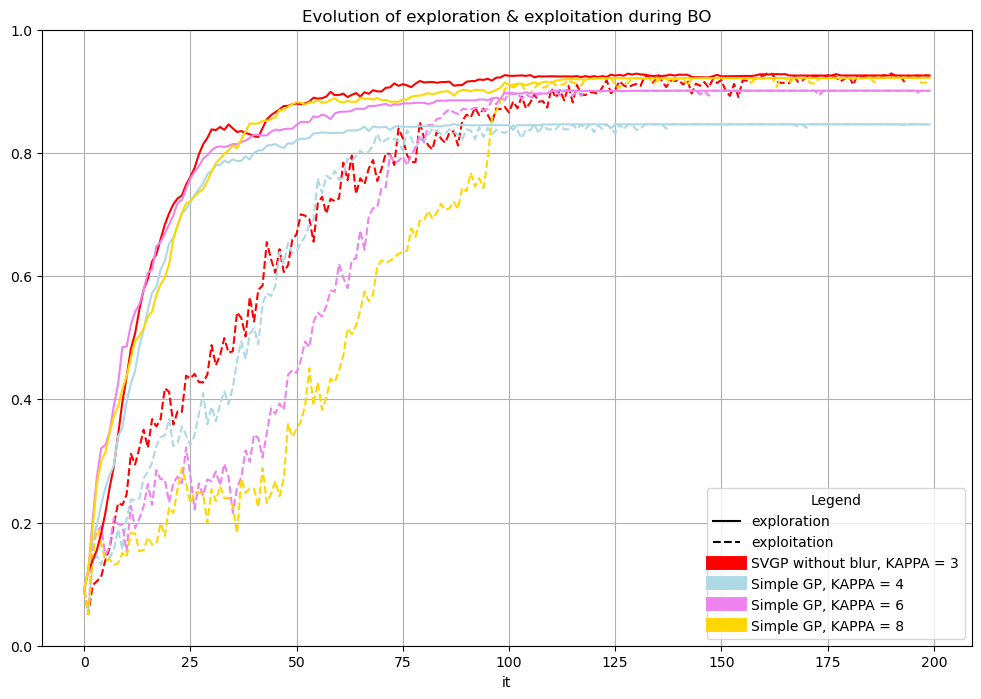

In [116]:

# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown',
    'sim6': 'gold',
    'sim7': 'mediumaquamarine',
    'sim8': 'salmon',
    'sim9': 'plum',
    'sim10': 'lightskyblue'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
plt.plot(ppe3.exploitation(), color='r', linestyle='--')
# plt.plot(ppe4.exploitation(), color=colors['sim2'], linestyle='--')
# plt.plot(ppe5.exploitation(), color=colors['sim3'], linestyle='--')
# plt.plot(ppe6.exploitation(), color=colors['sim4'], linestyle='--')
# plt.plot(ppe7.exploitation(), color=colors['sim5'], linestyle='--')
# plt.plot(ppe8.exploitation(), color=colors['sim6'], linestyle='--')

plt.plot(pp4.exploitation(), color=colors['sim1'], linestyle='--')
plt.plot(pp6.exploitation(), color=colors['sim4'], linestyle='--')
plt.plot(pp8.exploitation(), color=colors['sim6'], linestyle='--')


# Plot validation losses 
plt.plot(ppe3.exploration(measured_location=True), color='r', linestyle='-')
# plt.plot(ppe4.exploration(measured_location=True), color=colors['sim2'], linestyle='-')
# plt.plot(ppe5.exploration(measured_location=True), color=colors['sim3'], linestyle='-')
# plt.plot(ppe6.exploration(measured_location=True), color=colors['sim4'], linestyle='-')
# plt.plot(ppe7.exploration(measured_location=True), color=colors['sim5'], linestyle='-')
# plt.plot(ppe8.exploration(measured_location=True), color=colors['sim6'], linestyle='-')

plt.plot(pp4.exploration(measured_location=True), color=colors['sim1'], linestyle='-')
plt.plot(pp6.exploration(measured_location=True), color=colors['sim4'], linestyle='-')
plt.plot(pp8.exploration(measured_location=True), color=colors['sim6'], linestyle='-')

# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')

model1_patch = mlines.Line2D([], [], color='r', label='SVGP without blur, KAPPA = 3', linestyle='-', linewidth = '10')
model2_patch = mlines.Line2D([], [], color=colors['sim1'], label='Simple GP, KAPPA = 4', linestyle='-', linewidth = '10')
# model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='KAPPA = 5', linestyle='-', linewidth = '10')
model4_patch = mlines.Line2D([], [], color=colors['sim4'], label='Simple GP, KAPPA = 6', linestyle='-', linewidth = '10')
# model5_patch = mlines.Line2D([], [], color=colors['sim5'], label='KAPPA = 7', linestyle='-', linewidth = '10')
model6_patch = mlines.Line2D([], [], color=colors['sim6'], label='Simple GP, KAPPA = 8', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, model1_patch, model2_patch, model4_patch, model6_patch],
           title='Legend')

# Add labels and title
plt.xlabel('it')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO")
plt.grid()

# Display the plot
plt.show()

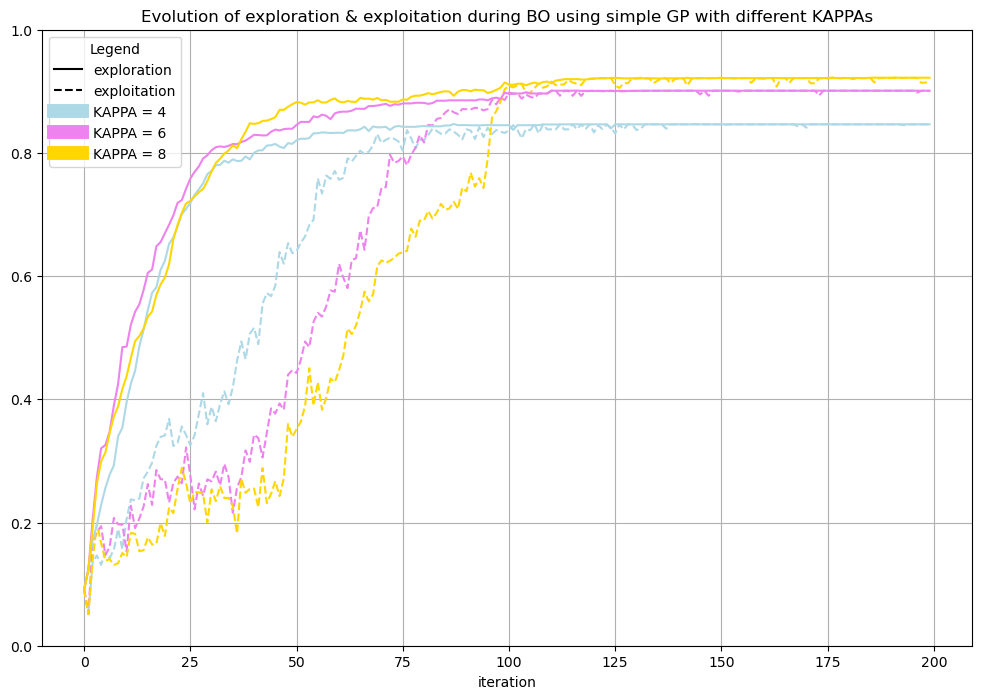

In [115]:

# Assign colors for each model
colors = {
    'sim1': 'lightblue',
    'sim2': 'lightcoral',
    'sim3': 'lightgreen',
    'sim4': 'violet',
    'sim5': 'sandybrown',
    'sim6': 'gold',
    'sim7': 'mediumaquamarine',
    'sim8': 'salmon',
    'sim9': 'plum',
    'sim10': 'lightskyblue'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
# plt.plot(ppe3.exploitation(), color='r', linestyle='--')
# plt.plot(ppe4.exploitation(), color=colors['sim2'], linestyle='--')
# plt.plot(ppe5.exploitation(), color=colors['sim3'], linestyle='--')
# plt.plot(ppe6.exploitation(), color=colors['sim4'], linestyle='--')
# plt.plot(ppe7.exploitation(), color=colors['sim5'], linestyle='--')
# plt.plot(ppe8.exploitation(), color=colors['sim6'], linestyle='--')

plt.plot(pp4.exploitation(), color=colors['sim1'], linestyle='--')
plt.plot(pp6.exploitation(), color=colors['sim4'], linestyle='--')
plt.plot(pp8.exploitation(), color=colors['sim6'], linestyle='--')


# Plot validation losses 
# plt.plot(ppe3.exploration(measured_location=True), color='r', linestyle='-')
# plt.plot(ppe4.exploration(measured_location=True), color=colors['sim2'], linestyle='-')
# plt.plot(ppe5.exploration(measured_location=True), color=colors['sim3'], linestyle='-')
# plt.plot(ppe6.exploration(measured_location=True), color=colors['sim4'], linestyle='-')
# plt.plot(ppe7.exploration(measured_location=True), color=colors['sim5'], linestyle='-')
# plt.plot(ppe8.exploration(measured_location=True), color=colors['sim6'], linestyle='-')

plt.plot(pp4.exploration(measured_location=True), color=colors['sim1'], linestyle='-')
plt.plot(pp6.exploration(measured_location=True), color=colors['sim4'], linestyle='-')
plt.plot(pp8.exploration(measured_location=True), color=colors['sim6'], linestyle='-')

# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='exploration')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='exploitation')

# model1_patch = mlines.Line2D([], [], color='r', label='Using QueriesInfo with KAPPA = 3', linestyle='-', linewidth = '10')
model2_patch = mlines.Line2D([], [], color=colors['sim1'], label='KAPPA = 4', linestyle='-', linewidth = '10')
# model3_patch = mlines.Line2D([], [], color=colors['sim3'], label='KAPPA = 5', linestyle='-', linewidth = '10')
model4_patch = mlines.Line2D([], [], color=colors['sim4'], label='KAPPA = 6', linestyle='-', linewidth = '10')
# model5_patch = mlines.Line2D([], [], color=colors['sim5'], label='KAPPA = 7', linestyle='-', linewidth = '10')
model6_patch = mlines.Line2D([], [], color=colors['sim6'], label='KAPPA = 8', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, model2_patch, model4_patch, model6_patch],
           title='Legend')

# Add labels and title
plt.xlabel('iteration')
# plt.ylabel('exploration or exploitation')
# plt.yscale('log')
plt.ylim(0,1)
plt.title("Evolution of exploration & exploitation during BO using simple GP with different KAPPAs")
plt.grid()

# Display the plot
plt.show()